# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML
import matplotlib.style as style 
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import metrics
import utils 

In [2]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

id_node_a name_node_a  \
0  e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...     Airflow   
1  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
2  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
3  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
4  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   

                                           id_node_b  name_node_b  \
0  263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...  Integracion   
1  7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...       Hadoop   
2  fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...      MariaDB   
3  2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...   SQL Server   
4  e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...        MySQL   

                                     id_relationship  
0  099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...  
1  37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...  
2  d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...  
3  71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...  
4  44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...

In [3]:
#Drop Nodos que no sean personas
nodos = nodos[nodos["n.type"] == "person"]

#Display HTMl
display(nodos.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

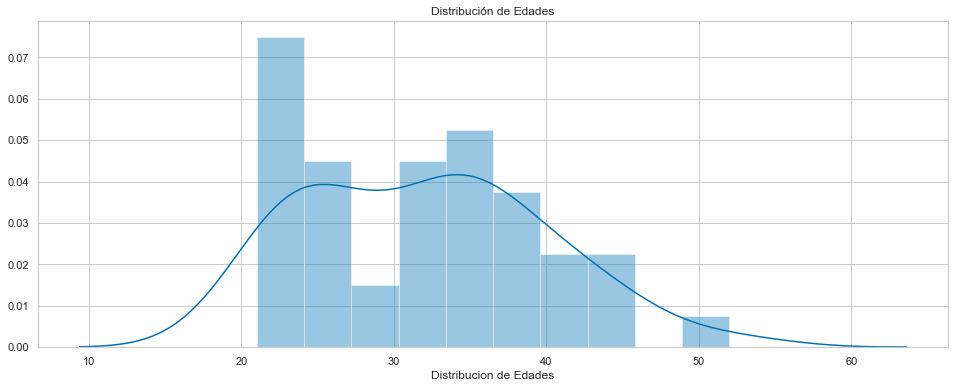

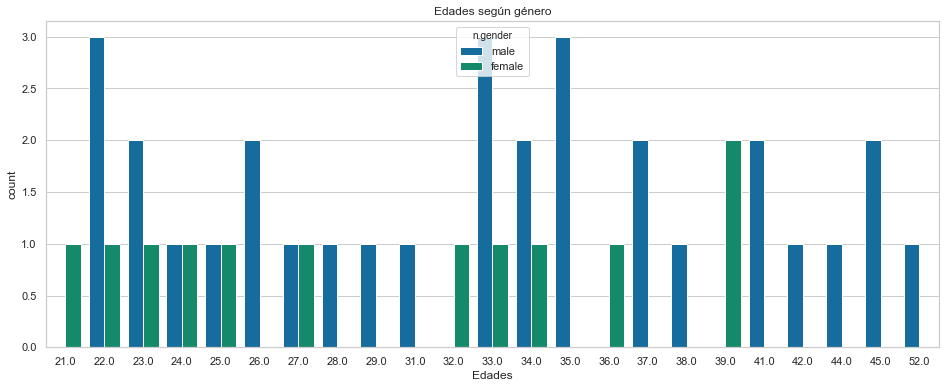

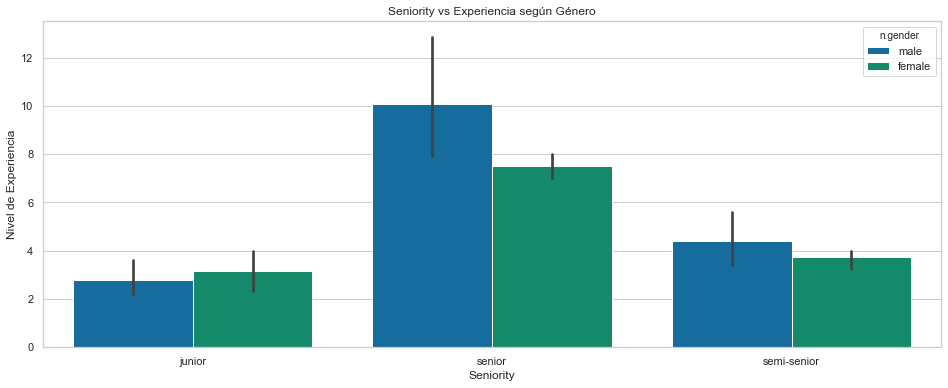

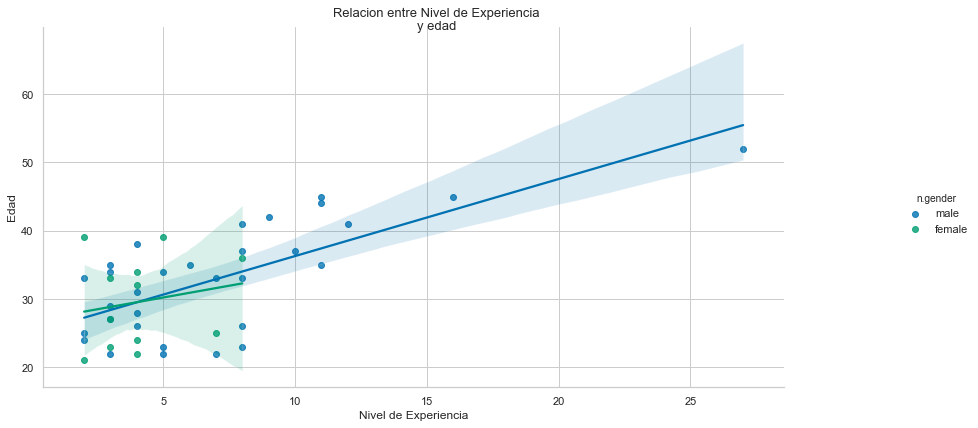

In [4]:
#Contexto
sns.set_style("whitegrid")
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Primeras Visualizaciones
#Distribucion de edades
plt.figure(figsize=(16.3, 6))
g = sns.distplot(nodos["n.age"], bins = 10, 
                 axlabel="Distribucion de Edades")
g.set_title("Distribución de Edades")
plt.show()

#Edades
plt.figure(figsize=(16, 6))
g = sns.countplot(data=nodos, x="n.age", hue="n.gender")
g.set(xlabel="Edades")
g.set_title("Edades según género")
plt.show()

#Experiencia vs Seniority
plt.figure(figsize=(16.1, 6))
g = sns.barplot(x="n.category", y="n.experience", 
                data=nodos, hue="n.gender")
g.set(xlabel='Seniority', ylabel='Nivel de Experiencia')
g.set_title("Seniority vs Experiencia según Género")
plt.show()

#Experiencia vs edad
g = sns.lmplot(x="n.experience", y="n.age",
              data=nodos, hue="n.gender")
g.fig.set_size_inches(15,6)
g.set(xlabel='Nivel de Experiencia', ylabel='Edad')
g.fig.suptitle("Relacion entre Nivel de Experiencia"  +"\n" + "y edad", fontsize=13, va="center")
plt.show()

In [5]:
#Seleccion de personas
personas = nodos[nodos["n.type"] == "person"]

#Merge en un solo df
df = personas.merge(relaciones)
display(df.head())
#display(personas)

#Genero una lista de trabajadores
print("Lista de trabajadores")
trabajadores = personas["name_node_a"].unique()
print(trabajadores)
print("\n")

#Skills
print("Skills")
tech = df["name_node_b"].unique()
print(tech)

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
2  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
3  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
4  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   

  n.category n.gender  n.age  n.experience  \
0     junior     male   29.0           3.0   
1     junior     male   29.0           3.0   
2     junior     male   29.0           3.0   
3     junior     male   29.0           3.0   
4     junior     male   29.0           3.0   

                                           id_node_a  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
1  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
2  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
3  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
4  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   

                                           id_node_b  name_node_b  \
0  e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...          AWS   
1  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...          DBA   
2  43b6f263edd9539008d17939797e828c-a87ff679a2f3e...  Golden Gate   
3  202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...         java   
4  7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...       Oracle   

                                     id_relationship  
0  799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...  
1  cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...  
2  d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...  
3  76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...  
4  fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...

Lista de trabajadores
['David H' 'Walter L' 'Dario O' 'Luis D' 'Edgardo O' 'Hernan U'
 'Cristian G' 'Diego M' 'Armando I' 'Ursula P' 'Esteban Q' 'Susana S'
 'Rircardo I' 'Luis U' 'Gabriela B' 'Hugo S' 'Martina S' 'Patricia L'
 'Mauricio H' 'Gustavo M' 'Oscar H' 'Miguel B' 'Karen H' 'Natali L'
 'Victoria B' 'Pablo A' 'Juan P' 'Mariana T' 'Luciano M' 'Marcela'
 'Daniel' 'Leonardo' 'Matias' 'Lionel' 'Miguel' 'Luciana' 'Marcelo'
 'Jonatan' 'Lucas' 'Fernando' 'Gastón' 'Andrea' 'Martin']


Skills
['AWS' 'DBA' 'Golden Gate' 'java' 'Oracle' 'SQL Server' 'Developer'
 'Linux' 'Docker' 'Vertica' 'Technical Leader' 'MariaDB' 'Data Scientist'
 'Hadoop' 'Spark' 'scala' 'PostgreSQL' 'Google cloud' 'R' 'MySQL' 'phyton'
 'windows' 'MongoDB' 'Oracle Cloud' 'unix' 'ODI' 'S3' 'EC2' 'Kubernetes'
 'talend' 'pentaho' 'neo4j' 'SQL' 'AWS Lambda' 'Redis' 'Azure']


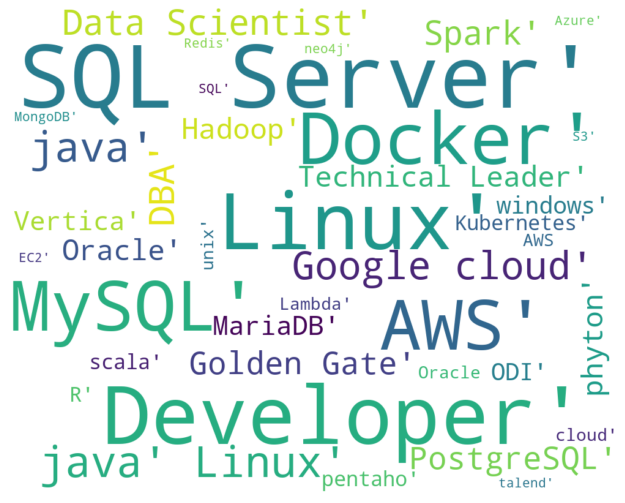

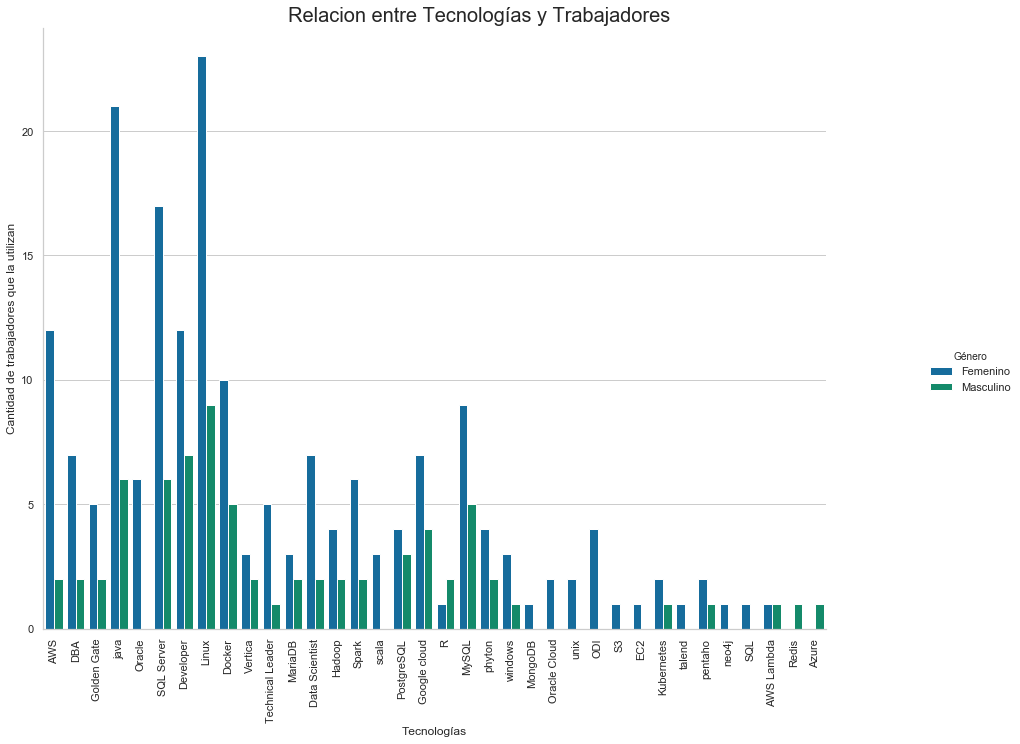

In [6]:
#Librerias
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Visualizaciones
#Skills
Skills = df['name_node_b'].values
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = wordcloud = WordCloud(width=1000, height=800, background_color="white")
wc.generate(str(Skills))
plt.figure(figsize = (16,9) )
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Gráfico y customización
g = sns.catplot(x="name_node_b", data=df, hue="n.gender", kind="count", legend_out=True)
plt.xticks(rotation=90)
g.fig.set_size_inches(15,10)
g.set(xlabel='Tecnologías', ylabel='Cantidad de trabajadores que la utilizan')
g.fig.suptitle("Relacion entre Tecnologías y Trabajadores", fontsize=20, va="center")
g._legend.set_title("Género")
new_labels = ['Femenino', 'Masculino']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#Visualización
plt.show()

<class 'networkx.classes.graph.Graph'>


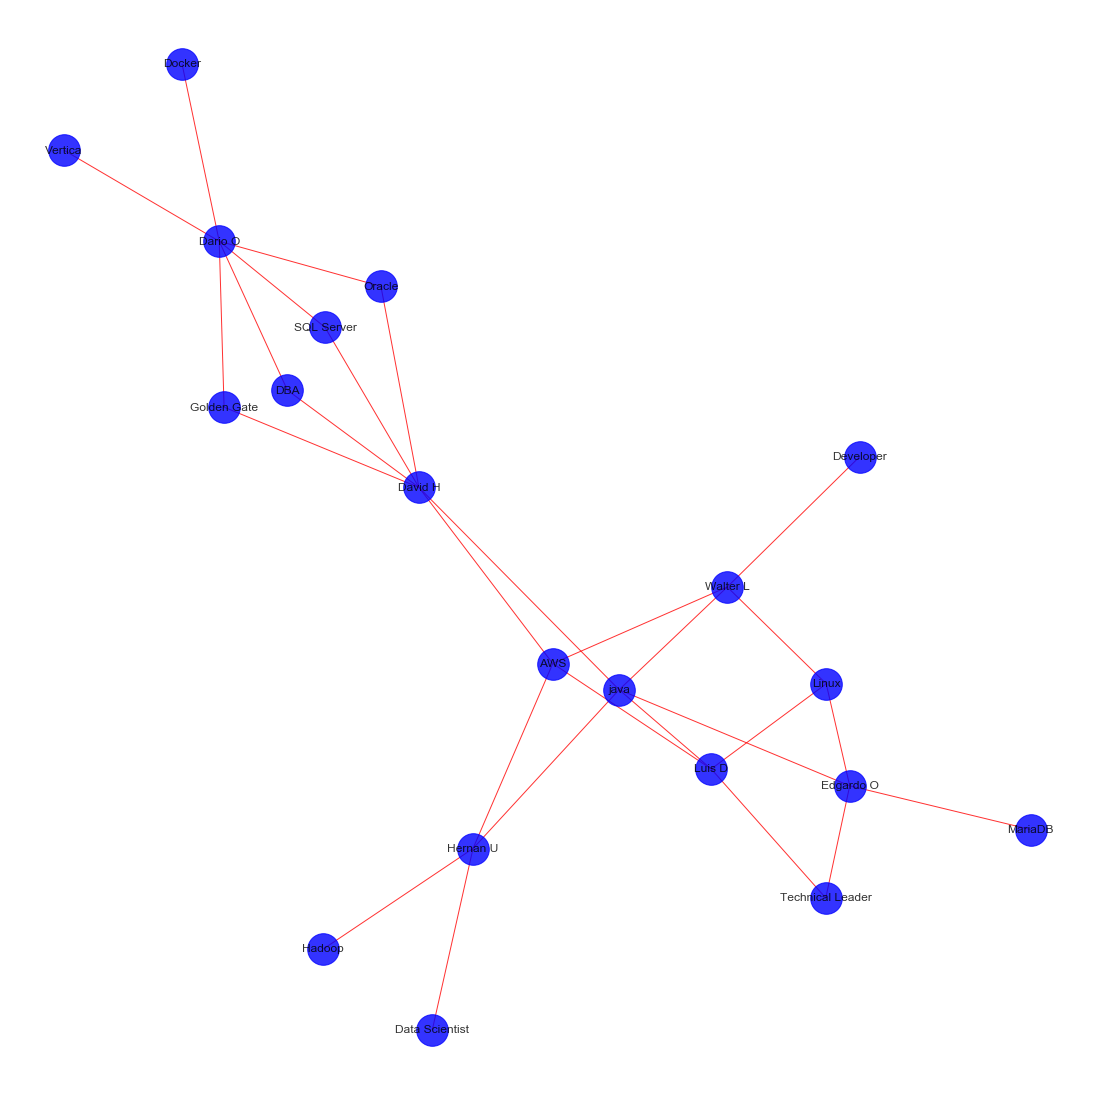

In [7]:
#Librerias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Df
df1 = df.iloc[0:30, :]
#display(df1)

#Gráfico
G = nx.from_pandas_edgelist(df1, 'name_node_a', 'name_node_b')

print(type(G))
# larger figure size
plt.figure(3,figsize=(15,15)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
nx.draw_spring(G, with_labels=True, node_color='b', node_size=1000, alpha=0.8, edge_color="r")
plt.show()


In [8]:
tabla = pd.DataFrame(index = [trabajadores], columns = [tech]) 
tabla["personas"] = trabajadores
display(tabla)
display(df) 

AWS  DBA Golden Gate java Oracle SQL Server Developer Linux  \
David H     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Walter L    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Dario O     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Luis D      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Edgardo O   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Hernan U    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Cristian G  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Diego M     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Armando I   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Ursula P    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Esteban Q   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Susana S    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Rircardo I  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Luis U      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Gabriela B  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Hugo S      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Martina S   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Patricia L  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Mauricio H  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Gustavo M   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Oscar H     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Miguel B    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Karen H     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Natali L    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Victoria B  NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Pablo A     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Juan P      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Mariana T   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Luciano M   NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Marcela     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Daniel      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Leonardo    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Matias      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Lionel      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Miguel      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Luciana     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Marcelo     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Jonatan     NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Lucas       NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Fernando    NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Gastón      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Andrea      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   
Martin      NaN  NaN         NaN  NaN    NaN        NaN       NaN   NaN   

           Docker Vertica  ...  EC2 Kubernetes talend pentaho neo4j  SQL  \
David H       NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Walter L      NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Dario O       NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Luis D        NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Edgardo O     NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Hernan U      NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Cristian G    NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Diego M       NaN     NaN  ...  NaN        NaN    NaN     NaN   NaN  NaN   
Armando I     NaN     NaN  

n.id name_node_a  n.type  \
0    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
2    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
3    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
4    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
..                                                 ...         ...     ...   
258  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   
259  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   
260  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   
261  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   
262  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   

    n.category n.gender  n.age  n.experience  \
0       junior     male   29.0           3.0   
1       junior     male   29.0           3.0   
2       junior     male   29.0           3.0   
3       junior     male   29.0           3.0   
4       junior     male   29.0           3.0   
..         ...      ...    ...           ...   
258     senior     male   34.0           5.0   
259     senior     male   34.0           5.0   
260     senior     male   34.0           5.0   
261     senior     male   34.0           5.0   
262     senior     male   34.0           5.0   

                                             id_node_a  \
0    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
1    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
2    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
3    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
4    d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
..                                                 ...   
258  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
259  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
260  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
261  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
262  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   

                                             id_node_b     name_node_b  \
0    e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...             AWS   
1    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...             DBA   
2    43b6f263edd9539008d17939797e828c-a87ff679a2f3e...     Golden Gate   
3    202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...            java   
4    7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...          Oracle   
..                                                 ...             ...   
258  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...  Data Scientist   
259  51ffd7144fcc4ddc688bf08869913f7f-a87ff679a2f3e...         Vertica   
260  2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...      SQL Server   
261  bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...          phyton   
262  de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...             ODI   

                                       id_relationship  
0    799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...  
1    cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...  
2    d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...  
3    76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...  
4    fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...  
..                                                 ...  
258  ab71f48b5ba1181da8e76118b28489ef-c81e728d9d4c2...  
259  dbc92bf247537dbeb663cf99c545ae10-a87ff679a2f3e...  
260  f22351b7ee28abe1ce38de89cc37e301-a87ff679a2f3e...  
261  18efebc43d1a0da0010e102c804f7e36-a87ff679a2f3e...  
262  2e5a2a961bb7f5ef615b927a922c6983-a87ff679a2f3e...  

[263 rows x 11 columns]

# Generamos estadísticas descriptivas del nodo.


In [9]:
nodos.describe()

n.age  n.experience
count  43.000000     43.000000
mean   32.023256      6.232558
std     7.753612      4.602469
min    21.000000      2.000000
25%    25.000000      3.000000
50%    33.000000      5.000000
75%    37.000000      8.000000
max    52.000000     27.000000

Analizamos los tipos de datos de cada campo inferidos por panda de los nodos

Analizamos los tipos de datos de cada campo inferidos por pandas de las relaciones



In [10]:
# Generamos estadísticas descriptivas de las relaciones
relaciones.describe()

id_node_a name_node_a  \
count                                                 383         383   
unique                                                 93          93   
top     eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...       Team3   
freq                                                   16          16   

                                                id_node_b name_node_b  \
count                                                 383         383   
unique                                                100          99   
top     35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...       Linux   
freq                                                   32          32   

                                          id_relationship  
count                                                 383  
unique                                                383  
top     48d5e94f3c8823968db1667365c82486-c81e728d9d4c2...  
freq                                                    1

In [11]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

Tipo
Campo                  
id_node_a        object
name_node_a      object
id_node_b        object
name_node_b      object
id_relationship  object

In [12]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas)

n.id name_node_a  n.type  \
0   d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1   f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2   55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3   eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4   40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   
5   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U  person   
6   f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...  Cristian G  person   
7   db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M  person   
8   c720cbe09318399805229024f20a1822-c81e728d9d4c2...   Armando I  person   
9   0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P  person   
10  d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   Esteban Q  person   
11  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...    Susana S  person   
12  f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...  Rircardo I  person   
13  b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...      Luis U  person   
14  f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...  Gabriela B  person   
15  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S  person   
16  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S  person   
17  471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...  Patricia L  person   
18  6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2...  Mauricio H  person   
19  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M  person   
20  50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...     Oscar H  person   
21  f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2...    Miguel B  person   
22  6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...     Karen H  person   
23  3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...    Natali L  person   
24  ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2...  Victoria B  person   
25  87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2...     Pablo A  person   
26  a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...      Juan P  person   
27  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T  person   
28  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M  person   
31  1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...     Marcela  person   
32  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel  person   
33  e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...    Leonardo  person   
34  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias  person   
35  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel  person   
36  f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...      Miguel  person   
37  822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...     Luciana  person   
38  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...     Marcelo  person   
47  79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...     Jonatan  person   
48  6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...       Lucas  person   
49  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando  person   
50  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...      Gastón  person   
51  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea  person   
52  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   

     n.category n.gender  n.age  n.experience  
0        junior     male   29.0           3.0  
1        senior     male   52.0          27.0  
2   semi-senior     male   34.0           3.0  
3        senior     male   33.0           8.0  
4        senior     male   42.0           9.0  
5   semi-senior     male   22.0           7.0  
6        senior     male   37.0          10.0  
7        senior     male   35.0          11.0  
8   semi-senior     male   23.0           8.0  
9        junior   female   39.0           5.0  
10       junior     male   38.0           4.0  
11       senior   female   36.0           8.0  
12  semi-senior     male   22.0     

In [13]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

Tipo
Campo                
n.id           object
name_node_a    object
n.type         object
n.category     object
n.gender       object
n.age         float64
n.experience  float64

Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [14]:
personas.describe()

Campo      n.age  n.experience
count  43.000000     43.000000
mean   32.023256      6.232558
std     7.753612      4.602469
min    21.000000      2.000000
25%    25.000000      3.000000
50%    33.000000      5.000000
75%    37.000000      8.000000
max    52.000000     27.000000

Para visualizar la distribución de las edades

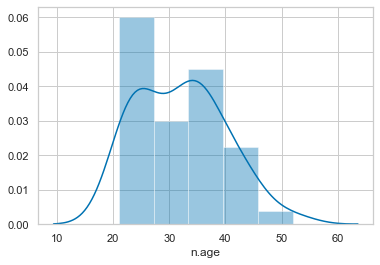

In [15]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [16]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

index  n.gender
0    male   0.72093
1  female   0.27907

In [17]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

index  n.category
0       senior    0.418605
1  semi-senior    0.325581
2       junior    0.255814

Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [18]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [19]:
display(resultante.head())

Campo                                               n.id name_node_a_x  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
1      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
2      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
3      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
4      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   

Campo  n.type n.category n.gender  n.age  n.experience  \
0      person     junior     male   29.0           3.0   
1      person     junior     male   29.0           3.0   
2      person     junior     male   29.0           3.0   
3      person     junior     male   29.0           3.0   
4      person     junior     male   29.0           3.0   

Campo                                          id_node_a name_node_a_y  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
1      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
2      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
3      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   
4      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...       David H   

Campo                                          id_node_b  name_node_b  \
0      e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...          AWS   
1      720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...          DBA   
2      43b6f263edd9539008d17939797e828c-a87ff679a2f3e...  Golden Gate   
3      202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...         java   
4      7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...       Oracle   

Campo                                    id_relationship  
0      799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...  
1      cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...  
2      d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...  
3      76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...  
4      fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...

Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [20]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]

Campo n.category name_node_a_y     name_node_b
0         junior       David H             AWS
1         junior       David H             DBA
2         junior       David H     Golden Gate
3         junior       David H            java
4         junior       David H          Oracle
..           ...           ...             ...
258       senior        Martin  Data Scientist
259       senior        Martin         Vertica
260       senior        Martin      SQL Server
261       senior        Martin          phyton
262       senior        Martin             ODI

[263 rows x 3 columns]

# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales


a.

In [21]:
pd.Series(nodos.index, dtype=str).describe()

count     43
unique    43
top        9
freq       1
dtype: object

In [22]:
nodos[nodos.index.duplicated()]

Empty DataFrame
Columns: [n.id, name_node_a, n.type, n.category, n.gender, n.age, n.experience]
Index: []

In [23]:
pd.Series(relaciones.index, dtype=str).describe()

count     383
unique    383
top        38
freq        1
dtype: object

In [24]:
relaciones[relaciones.index.duplicated()]

Empty DataFrame
Columns: [id_node_a, name_node_a, id_node_b, name_node_b, id_relationship]
Index: []

Conclusión: no hay índices/ids/claves duplicados.

b.

In [25]:
nodos[nodos.duplicated()]

Empty DataFrame
Columns: [n.id, name_node_a, n.type, n.category, n.gender, n.age, n.experience]
Index: []

In [26]:
relaciones[relaciones.duplicated()]

Empty DataFrame
Columns: [id_node_a, name_node_a, id_node_b, name_node_b, id_relationship]
Index: []

c.

In [27]:
display(nodos.columns[~nodos.columns.str.match(r'^(\w+)$')])

Index(['n.id', 'n.type', 'n.category', 'n.gender', 'n.age', 'n.experience'], dtype='object', name='Campo')

In [28]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos.head()

Campo                                               n_id name_node_a  n_type  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2      55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3      eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4      40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

Campo   n_category n_gender  n_age  n_experience  
0           junior     male   29.0           3.0  
1           senior     male   52.0          27.0  
2      semi-senior     male   34.0           3.0  
3           senior     male   33.0           8.0  
4           senior     male   42.0           9.0

In [29]:
display(relaciones.columns[~relaciones.columns.str.match(r'^(\w+)$')])

Index([], dtype='object', name='Campo')

d.

In [30]:
# helpful character encoding module
import chardet
import string
# look at the first ten thousand bytes to guess the character encoding
with open('nodes.csv', 'rb') as rawdata_nodos:
    result = chardet.detect(rawdata_nodos.read(1000))

# check what the character encoding might be
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [31]:
import ftfy.badness as bad

In [32]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [33]:
for c in nodos.columns:
    name = c+'weirdness'
    nodos[name] = nodos[c].apply(weird)
    print(nodos[nodos[name] > 1].count())

Campo
n_id             0
name_node_a      0
n_type           0
n_category       0
n_gender         0
n_age            0
n_experience     0
n_idweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
n_categoryweirdness     0
dtype

In [34]:
for c in relaciones.columns:
    name = c+'weirdness'
    relaciones[name] = relaciones[c].apply(weird)
    print(relaciones[relaciones[name] > 1].count())

Campo
id_node_a             0
name_node_a           0
id_node_b             0
name_node_b           0
id_relationship       0
id_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
name_node_bweirdness    0
dtype: int64
Campo
id_node_a                   0
name_node_a                 0
id_node_b                   0
name_node_b                 0
id_relationship             0


e.

In [35]:
nodos[(nodos.n_type == 'team') & (nodos.n_age != 0)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [36]:
nodos[(nodos.n_type == 'person') & (nodos.n_age == 0)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [37]:
nodos[(nodos.n_type == "person") & (nodos.n_age < nodos.n_experience)]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

f.

plt.hist(nodos[nodos.n_type=='person'].n_age.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdfaaacf08>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdfaaafd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdfaaa0e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdfaab49c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdfaab4fc8>],
 'means': []}

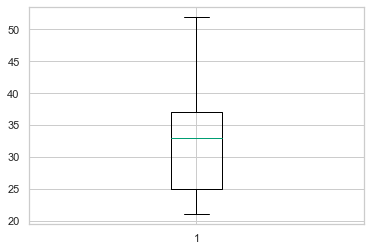

In [38]:
plt.boxplot(nodos[nodos.n_type=='person'].n_age.dropna(), whis=3)

In [39]:
outliers = nodos[nodos.n_age > (nodos.n_age.mean() + 3 * nodos.n_age.std())]
display(outliers)

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

(array([21.,  5., 10.,  4.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ]),
 <a list of 10 Patch objects>)

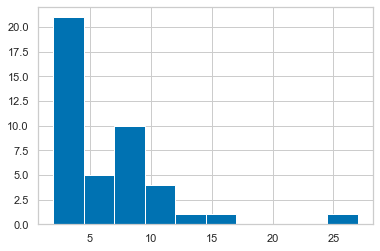

In [40]:
plt.hist(nodos[nodos.n_type=='person'].n_experience.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdfab8cec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdfab93b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdfab8c908>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdfab98688>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdfab98bc8>],
 'means': []}

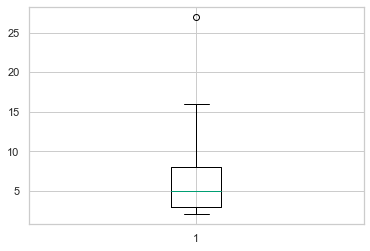

In [41]:
plt.boxplot(nodos[nodos.n_type=='person'].n_experience.dropna(), whis=3)

In [42]:
outliers = nodos[nodos.n_experience > (nodos.n_experience.mean() + 3 * nodos.n_experience.std())]
display(outliers)

Campo                                               n_id name_node_a  n_type  \
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   

Campo n_category n_gender  n_age  n_experience  n_idweirdness  \
1         senior     male   52.0          27.0              0   

Campo  name_node_aweirdness  n_typeweirdness  n_categoryweirdness  \
1                         0                0                    0   

Campo  n_genderweirdness  n_ageweirdness  n_experienceweirdness  
1                      0               0                      0

In [43]:
nodos[nodos.n_experience == 27]

Campo                                               n_id name_node_a  n_type  \
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   

Campo n_category n_gender  n_age  n_experience  n_idweirdness  \
1         senior     male   52.0          27.0              0   

Campo  name_node_aweirdness  n_typeweirdness  n_categoryweirdness  \
1                         0                0                    0   

Campo  n_genderweirdness  n_ageweirdness  n_experienceweirdness  
1                      0               0                      0

Outliers: todos los valores están dentro de 3 desviaciones estándares. Hay una sola persona que cae fuera de 2 DS, con 27 años de experiencia, pero hemos decidido mantener el dato dado el tamaño de la muestra analizada. Utilizamos el criterio de 3 DS a pesar de que los datos muestrales no se distribuyan normal, por convención y falta de un mejor criterio.

g.

In [44]:
datos_faltantes_nodos_cuenta = nodos.isnull().sum()
datos_faltantes_nodos_cuenta

Campo
n_id                     0
name_node_a              0
n_type                   0
n_category               0
n_gender                 0
n_age                    0
n_experience             0
n_idweirdness            0
name_node_aweirdness     0
n_typeweirdness          0
n_categoryweirdness      0
n_genderweirdness        0
n_ageweirdness           0
n_experienceweirdness    0
dtype: int64

In [45]:
nodos[(nodos.n_type == "person") & (nodos.n_category == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [46]:
nodos[(nodos.n_type == "person") & (nodos.n_gender == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [47]:
nodos[(nodos.n_type == "person") & (nodos.n_age == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [48]:
nodos[(nodos.n_type == "person") & (nodos.n_experience == "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [49]:
nodos[nodos.n_type.isnull()]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [50]:
nodos = nodos[nodos['name_node_a'] != 'Perfiles']
nodos

Campo                                               n_id name_node_a  n_type  \
0      d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1      f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2      55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3      eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4      40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   
5      39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U  person   
6      f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...  Cristian G  person   
7      db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M  person   
8      c720cbe09318399805229024f20a1822-c81e728d9d4c2...   Armando I  person   
9      0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P  person   
10     d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   Esteban Q  person   
11     02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...    Susana S  person   
12     f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...  Rircardo I  person   
13     b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...      Luis U  person   
14     f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...  Gabriela B  person   
15     044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S  person   
16     bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S  person   
17     471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...  Patricia L  person   
18     6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2...  Mauricio H  person   
19     9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M  person   
20     50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...     Oscar H  person   
21     f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2...    Miguel B  person   
22     6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...     Karen H  person   
23     3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...    Natali L  person   
24     ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2...  Victoria B  person   
25     87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2...     Pablo A  person   
26     a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...      Juan P  person   
27     57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T  person   
28     ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M  person   
31     1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...     Marcela  person   
32     f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel  person   
33     e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...    Leonardo  person   
34     10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias  person   
35     bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel  person   
36     f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...      Miguel  person   
37     822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...     Luciana  person   
38     a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...     Marcelo  person   
47     79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...     Jonatan  person   
48     6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...       Lucas  person   
49     51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando  person   
50     f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...      Gastón  person   
51     533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea  person   
52     8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin  person   

Campo   n_category n_gender  n_age  n_experience  n_idweirdness  \
0           junior     male   29.0           3.0              0   
1           senior     male   52.0          27.0              0   
2      semi-senior     male   34.0           3.0              0   
3           senior     male   33.0           8.0              0   
4           senior     male   42.0           9.0              0   
5      semi-senior     male   22.0           7.0              0   
6         

In [51]:
nodos[(nodos.n_experience == "NaN") & (nodos.n_age != "NaN")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [52]:
nodos[(nodos.n_age == "0")]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [53]:
nodos[nodos.n_category.isnull()].head()

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [54]:
nodos[nodos.n_age == 0]

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

In [55]:
nodos[nodos.n_age == 0].replace(0, 'NaN')

Empty DataFrame
Columns: [n_id, name_node_a, n_type, n_category, n_gender, n_age, n_experience, n_idweirdness, name_node_aweirdness, n_typeweirdness, n_categoryweirdness, n_genderweirdness, n_ageweirdness, n_experienceweirdness]
Index: []

h.
## PREPARAMOS EL DATA SET 1 y 2

In [56]:
#Recargamos los datos 
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

In [57]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos[nodos.n_age == 0].replace(0, 'NaN')

n_id       name_node_a  \
29   eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...             Team3   
30   73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...             Team2   
53   4cd45b1d7210ec9b517bd44c201454ba-a87ff679a2f3e...             Team1   
89   2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...        SQL Server   
92   202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...              java   
93   bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...            phyton   
100  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
101  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
102  ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...    Data Architect   
103  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
104  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
105  a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...     Data Engineer   

           n_type n_category n_gender n_age n_experience  
29           team        NaN      NaN   NaN          NaN  
30           team        NaN      NaN   NaN          NaN  
53           team        NaN      NaN   NaN          NaN  
89   technologies        NaN      NaN   NaN          NaN  
92   technologies        NaN      NaN   NaN          NaN  
93   technologies        NaN      NaN   NaN          NaN  
100         skill        NaN      NaN   NaN          NaN  
101         skill        NaN      NaN   NaN          NaN  
102         skill        NaN      NaN   NaN          NaN  
103         skill        NaN      NaN   NaN          NaN  
104         skill        NaN      NaN   NaN          NaN  
105         skill        NaN      NaN   NaN          NaN

In [58]:
df_1 = nodos.merge(relaciones, left_on='n_id', right_on='id_node_a')
df_1 = df_1[df_1['n_type']=='person'][['name_node_a_x', 'name_node_b', 'n_category', 'n_age', 'n_experience']]

In [59]:
df2 = nodos[nodos.n_type=='skill'].merge(relaciones, left_on='n_id', right_on='id_node_b')
df2 = df2[['name_node_a_x', 'n_type', 'name_node_a_y', 'id_node_a', 'id_node_b']]
df2

name_node_a_x n_type name_node_a_y  \
0     Data Scientist  skill       Diego M   
1     Data Scientist  skill      Fernando   
2     Data Scientist  skill     Gustavo M   
3     Data Scientist  skill      Hernan U   
4     Data Scientist  skill        Hugo S   
5     Data Scientist  skill     Luciano M   
6     Data Scientist  skill     Mariana T   
7     Data Scientist  skill        Martin   
8     Data Scientist  skill      Natali L   
9     Data Scientist  skill      Perfiles   
10               DBA  skill       Dario O   
11               DBA  skill       David H   
12               DBA  skill        Gastón   
13               DBA  skill       Jonatan   
14               DBA  skill         Lucas   
15               DBA  skill        Luis U   
16               DBA  skill       Marcelo   
17               DBA  skill     Martina S   
18               DBA  skill      Perfiles   
19               DBA  skill      Ursula P   
20    Data Architect  skill      Perfiles   
21         Developer  skill        Andrea   
22         Developer  skill     Armando I   
23         Developer  skill    Cristian G   
24         Developer  skill     Esteban Q   
25         Developer  skill    Gabriela B   
26         Developer  skill        Juan P   
27         Developer  skill       Karen H   
28         Developer  skill      Leonardo   
29         Developer  skill       Luciana   
30         Developer  skill       Marcela   
31         Developer  skill        Matias   
32         Developer  skill        Miguel   
33         Developer  skill      Miguel B   
34         Developer  skill       Oscar H   
35         Developer  skill       Pablo A   
36         Developer  skill    Patricia L   
37         Developer  skill      Perfiles   
38         Developer  skill    Rircardo I   
39         Developer  skill    Victoria B   
40         Developer  skill      Walter L   
41  Technical Leader  skill        Daniel   
42  Technical Leader  skill     Edgardo O   
43  Technical Leader  skill        Lionel   
44  Technical Leader  skill        Luis D   
45  Technical Leader  skill    Mauricio H   
46  Technical Leader  skill      Perfiles   
47  Technical Leader  skill      Susana S   
48     Data Engineer  skill      Perfiles   

                                            id_node_a  \
0   db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1   51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
2   9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   
3   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
4   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...   
5   ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
6   57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   
7   8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
8   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...   
9   dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
10  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...   
11  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
12  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...   
13  79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...   
14  6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...   
15  b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...   
16  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...   
17  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   
18  dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
19  0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...   
20  dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
21  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...   
22  c720cbe09318399805229024f20a1822-c81e728d9d4c2...   
23  f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...   
24  d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   
25  f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...   
26  a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...   
27  6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...   
28  e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...   
29  822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9

In [60]:
t = nodos[nodos.n_type=='technologies'].merge(relaciones)
t = t[['n_id', 'name_node_a', 'id_node_b']]

df2.merge(t, left_on='id_node_b' , right_on='id_node_b')
display(df2)

name_node_a_x n_type name_node_a_y  \
0     Data Scientist  skill       Diego M   
1     Data Scientist  skill      Fernando   
2     Data Scientist  skill     Gustavo M   
3     Data Scientist  skill      Hernan U   
4     Data Scientist  skill        Hugo S   
5     Data Scientist  skill     Luciano M   
6     Data Scientist  skill     Mariana T   
7     Data Scientist  skill        Martin   
8     Data Scientist  skill      Natali L   
9     Data Scientist  skill      Perfiles   
10               DBA  skill       Dario O   
11               DBA  skill       David H   
12               DBA  skill        Gastón   
13               DBA  skill       Jonatan   
14               DBA  skill         Lucas   
15               DBA  skill        Luis U   
16               DBA  skill       Marcelo   
17               DBA  skill     Martina S   
18               DBA  skill      Perfiles   
19               DBA  skill      Ursula P   
20    Data Architect  skill      Perfiles   
21         Developer  skill        Andrea   
22         Developer  skill     Armando I   
23         Developer  skill    Cristian G   
24         Developer  skill     Esteban Q   
25         Developer  skill    Gabriela B   
26         Developer  skill        Juan P   
27         Developer  skill       Karen H   
28         Developer  skill      Leonardo   
29         Developer  skill       Luciana   
30         Developer  skill       Marcela   
31         Developer  skill        Matias   
32         Developer  skill        Miguel   
33         Developer  skill      Miguel B   
34         Developer  skill       Oscar H   
35         Developer  skill       Pablo A   
36         Developer  skill    Patricia L   
37         Developer  skill      Perfiles   
38         Developer  skill    Rircardo I   
39         Developer  skill    Victoria B   
40         Developer  skill      Walter L   
41  Technical Leader  skill        Daniel   
42  Technical Leader  skill     Edgardo O   
43  Technical Leader  skill        Lionel   
44  Technical Leader  skill        Luis D   
45  Technical Leader  skill    Mauricio H   
46  Technical Leader  skill      Perfiles   
47  Technical Leader  skill      Susana S   
48     Data Engineer  skill      Perfiles   

                                            id_node_a  \
0   db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1   51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
2   9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   
3   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
4   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...   
5   ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
6   57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   
7   8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
8   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...   
9   dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
10  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...   
11  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...   
12  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...   
13  79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...   
14  6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...   
15  b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...   
16  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...   
17  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   
18  dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
19  0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...   
20  dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...   
21  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...   
22  c720cbe09318399805229024f20a1822-c81e728d9d4c2...   
23  f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...   
24  d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   
25  f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...   
26  a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...   
27  6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...   
28  e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...   
29  822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9

In [61]:
a = nodos[nodos['n_type']=='technologies']
techs = a['name_node_a'].unique()
a = df2.merge(df_1, left_on='name_node_a_y', right_on='name_node_a_x')
display(a)

name_node_a_x_x n_type name_node_a_y  \
0      Data Scientist  skill       Diego M   
1      Data Scientist  skill       Diego M   
2      Data Scientist  skill       Diego M   
3      Data Scientist  skill       Diego M   
4      Data Scientist  skill       Diego M   
..                ...    ...           ...   
258  Technical Leader  skill      Susana S   
259  Technical Leader  skill      Susana S   
260  Technical Leader  skill      Susana S   
261  Technical Leader  skill      Susana S   
262  Technical Leader  skill      Susana S   

                                             id_node_a  \
0    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
2    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
3    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
4    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
..                                                 ...   
258  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...   
259  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...   
260  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...   
261  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...   
262  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...   

                                             id_node_b name_node_a_x_y  \
0    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...         Diego M   
1    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...         Diego M   
2    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...         Diego M   
3    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...         Diego M   
4    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...         Diego M   
..                                                 ...             ...   
258  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...        Susana S   
259  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...        Susana S   
260  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...        Susana S   
261  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...        Susana S   
262  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...        Susana S   

          name_node_b n_category  n_age  n_experience  
0      Data Scientist     senior   35.0          11.0  
1              Docker     senior   35.0          11.0  
2              Hadoop     senior   35.0          11.0  
3                java     senior   35.0          11.0  
4               scala     senior   35.0          11.0  
..                ...        ...    ...           ...  
258              java     senior   36.0           8.0  
259             Linux     senior   36.0           8.0  
260        PostgreSQL     senior   36.0           8.0  
261        SQL Server     senior   36.0           8.0  
262  Technical Leader     senior   36.0           8.0  

[263 rows x 10 columns]

# Introducción al aprendizaje automático

Lo primero que tenemos que entender es la jerarquía de los datos organizados en grafos de acuerdo a lo que necesitemos.
En este caso:
* Skills: nodo tipo skill
* Personas: not tipo person
* Tecnologias: nodo tipo knowledge

Con estas vinculaciones trataremos de responder a la pregunta de la relación entre el conocimiento que poseen las personas y sus años de experiencia.


In [62]:
# Repetimos aquí la carga de los archivos
import pandas as pd
import numpy as np

#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

n.id name_node_a  n.type  \
0  d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H  person   
1  f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L  person   
2  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O  person   
3  eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D  person   
4  40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O  person   

    n.category n.gender  n.age  n.experience  
0       junior     male   29.0           3.0  
1       senior     male   52.0          27.0  
2  semi-senior     male   34.0           3.0  
3       senior     male   33.0           8.0  
4       senior     male   42.0           9.0

id_node_a name_node_a  \
0  e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...     Airflow   
1  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
2  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
3  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   
4  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea   

                                           id_node_b  name_node_b  \
0  263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...  Integracion   
1  7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...       Hadoop   
2  fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...      MariaDB   
3  2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...   SQL Server   
4  e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...        MySQL   

                                     id_relationship  
0  099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...  
1  37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...  
2  d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...  
3  71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...  
4  44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...

In [63]:
nodos['n.type'].unique()

array(['person', 'team', nan, 'technologies', 'skill', 'info'],
      dtype=object)

Trabajemos solo con los nodos Skills, Person y Technologies


In [64]:
#Definimos un dataset de skill
skills = nodos[nodos["n.type"] == "skill"]

# Mejoramos los nombres de las columnas
skills.columns = skills.columns.str.replace('n.id', 'skill_id')
skills.columns = skills.columns.str.replace('name_node_a', 'skill_name')
skills.columns = skills.columns.str.replace('n.type', 'skill_type')
# Extractamos solo las columnas necesarias
skills = skills[['skill_id','skill_name','skill_type']]
skills

skill_id        skill_name  \
100  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
101  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
102  ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...    Data Architect   
103  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
104  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
105  a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...     Data Engineer   

    skill_type  
100      skill  
101      skill  
102      skill  
103      skill  
104      skill  
105      skill

In [65]:
#Definimos un dataset de personas
persons = nodos[nodos["n.type"] == "person"]
# persons['n.id']
#Mejoramos los nombres
persons.columns = persons.columns.str.replace('n.id', 'person_id')
persons.columns = persons.columns.str.replace('name_node_a', 'person_name')
persons.columns = persons.columns.str.replace('n.type', 'person_type')
persons.columns = persons.columns.str.replace('n.category', 'person_category')
persons.columns = persons.columns.str.replace('n.gender', 'person_gender')
persons.columns = persons.columns.str.replace('n.age', 'person_age')
persons.columns = persons.columns.str.replace('n.experience', 'person_experience')

persons.set_index('person_id')
persons

person_id person_name person_type  \
0   d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...     David H      person   
1   f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...    Walter L      person   
2   55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O      person   
3   eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...      Luis D      person   
4   40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...   Edgardo O      person   
5   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U      person   
6   f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...  Cristian G      person   
7   db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M      person   
8   c720cbe09318399805229024f20a1822-c81e728d9d4c2...   Armando I      person   
9   0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P      person   
10  d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2...   Esteban Q      person   
11  02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2...    Susana S      person   
12  f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...  Rircardo I      person   
13  b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...      Luis U      person   
14  f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...  Gabriela B      person   
15  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S      person   
16  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S      person   
17  471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...  Patricia L      person   
18  6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2...  Mauricio H      person   
19  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M      person   
20  50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...     Oscar H      person   
21  f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2...    Miguel B      person   
22  6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2...     Karen H      person   
23  3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...    Natali L      person   
24  ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2...  Victoria B      person   
25  87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2...     Pablo A      person   
26  a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...      Juan P      person   
27  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T      person   
28  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M      person   
31  1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...     Marcela      person   
32  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel      person   
33  e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...    Leonardo      person   
34  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias      person   
35  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel      person   
36  f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...      Miguel      person   
37  822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...     Luciana      person   
38  a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...     Marcelo      person   
47  79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...     Jonatan      person   
48  6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...       Lucas      person   
49  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando      person   
50  f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...      Gastón      person   
51  533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...      Andrea      person   
52  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin      person   

   person_category person_gender  person_age  person_experience  
0           junior          male        29.0                3.0  
1           senior          male        52.0               27.0  
2      semi-senior          male        34.0                3.0  
3           senior          male        33.0                8.0  
4           senior          male        42.0                9.0  
5      semi-senior          male        22.0                7.0  
6           senio

In [66]:
#Definimos un dataset de tecnologias
technologies = nodos[nodos["n.type"] == "technologies"]
#Mejoramos los nombres
technologies.columns = technologies.columns.str.replace('n.id', 'technology_id')
technologies.columns = technologies.columns.str.replace('name_node_a', 'technology_name')
technologies.columns = technologies.columns.str.replace('n.type', 'technology_type')
technologies = technologies.drop(columns='n.category',axis=1)
technologies = technologies.drop(columns='n.gender',axis=1)
technologies = technologies.drop(columns='n.age',axis=1)
technologies = technologies.drop(columns='n.experience',axis=1)
technologies

technology_id  \
40   ff64319904f4832ee19df96250276033-c81e728d9d4c2...   
41   17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...   
42   31985bb925fa449ee8d01350cb2f008d-a87ff679a2f3e...   
43   e75155594a0fd8405cde512bd9aaedad-a87ff679a2f3e...   
44   c75df195acce9063a96459de85bc72b9-a87ff679a2f3e...   
..                                                 ...   
116  ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...   
117  362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...   
118  263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...   
119  de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...   
120  bb906c05289c29654b54a94ced2e697c-a87ff679a2f3e...   

                                 technology_name technology_type  
40                                       Inst DB    technologies  
41                                    AWS Lambda    technologies  
42                                   AWS Kinesis    technologies  
43                                      DynamoDB    technologies  
44   Monta un Cluster Hadoop Big Data desde Cero    technologies  
..                                           ...             ...  
116                                       talend    technologies  
117                                      pentaho    technologies  
118                                  Integracion    technologies  
119                                          ODI    technologies  
120                                    Lenguajes    technologies  

[67 rows x 3 columns]

In [67]:
#vamos a unir los dataset para analizarlos 
resultante = skills.merge(relaciones, left_on='skill_id', right_on='id_node_b')
resultante = resultante[['skill_id','skill_name','skill_type','id_node_a']]
resultante.set_index('id_node_a')
resultante



skill_id        skill_name  \
0   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
5   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
6   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
7   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
8   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
9   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
11  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
13  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
14  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
15  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
16  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
17  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
18  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
19  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
20  ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...    Data Architect   
21  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
22  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
23  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
24  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
25  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
26  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
27  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
28  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
29  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
30  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
31  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
32  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
33  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
34  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
35  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
36  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
37  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
38  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
39  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
40  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
41  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
42  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
43  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
44  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
45  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
46  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
47  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
48  a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...     Data Engineer   

   skill_type                                          id_node_a  
0       skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...  
1       skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...  
2       skill  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...  
3       skill  39f10109db2

In [68]:
# Vamos a vincular con las personas
resultante = resultante.merge(persons, left_on='id_node_a', right_on='person_id')
resultante.merge(persons, left_on='id_node_a', right_on='person_id')


skill_id        skill_name  \
0   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
5   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
6   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
7   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
8   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
9   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
11  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
13  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
14  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
15  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
16  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
17  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
18  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
19  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
20  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
21  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
22  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
23  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
24  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
25  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
26  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
27  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
28  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
29  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
30  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
31  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
32  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
33  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
34  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
35  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
36  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
37  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
38  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
39  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
40  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
41  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
42  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

   skill_type                                          id_node_a  \
0       skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1       skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
2       skill  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   
3       skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
4       skill  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...   
5       skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
6       skill  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   
7       skill  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...   
8       skill  3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...   
9       skill  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...

In [69]:

# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante 

skill_id        skill_name  \
0   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
5   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
6   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
7   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
8   6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
9   720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
10  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
11  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
12  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
13  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
14  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
15  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
16  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
17  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
18  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
19  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
20  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
21  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
22  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
23  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
24  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
25  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
26  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
27  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
28  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
29  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
30  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
31  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
32  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
33  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
34  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
35  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
36  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...         Developer   
37  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
38  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
39  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
40  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
41  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
42  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

   skill_type                                          person_id person_name  \
0       skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M   
1       skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando   
2       skill  9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...   Gustavo M   
3       skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...    Hernan U   
4       skill  044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...      Hugo S   
5       skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   Luciano M   
6       skill  57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...   Mariana T   
7       skill  8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...      Martin   
8       skill  3c6052e0f

In [70]:
# Vamos a vincular con las relaciones de las tecnologias
resultante = resultante.merge(relaciones[['id_node_a','id_node_b']], left_on='person_id', right_on='id_node_a')
relaciones["name_node_a"].unique()
resultante = resultante.merge(technologies, left_on='id_node_b', right_on='technology_id')
resultante

skill_id        skill_name  \
0    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
3    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
4    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
..                                                 ...               ...   
215  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
216  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
217  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
219  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

    skill_type                                          person_id person_name  \
0        skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M   
1        skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando   
2        skill  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O   
3        skill  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S   
4        skill  0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P   
..         ...                                                ...         ...   
215      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   
216      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel   
217      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel   
218      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   
219      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   

    person_type person_category person_gender  person_age  person_experience  \
0        person          senior          male        35.0               11.0   
1        person     semi-senior          male        28.0                4.0   
2        person     semi-senior          male        34.0                3.0   
3        person          junior        female        33.0                3.0   
4        person          junior        female        39.0                5.0   
..          ...             ...           ...         ...                ...   
215      person     semi-senior          male        35.0                3.0   
216      person          senior          male        44.0               11.0   
217      person          senior          male        44.0               11.0   
218      person     semi-senior          male        35.0                3.0   
219      person     semi-senior          male        35.0                3.0   

                                             id_node_a  \
0    db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1    51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
2    55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...   
3    bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   
4    0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...   
..                                                 ...   
215  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
216  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
217  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
218  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
219  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

                                             id_node_b  \
0    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...   
1    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...   
2    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...   
3    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...   
4    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...   
..                                                 ...   
215  c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...   
216  d37772bf703931e76d906eaafe580293-

In [71]:
# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante = resultante.drop(columns='id_node_b',axis=1)
resultante 

skill_id        skill_name  \
0    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
3    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
4    720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...               DBA   
..                                                 ...               ...   
215  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
216  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
217  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
219  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

    skill_type                                          person_id person_name  \
0        skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...     Diego M   
1        skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...    Fernando   
2        skill  55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...     Dario O   
3        skill  bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...   Martina S   
4        skill  0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...    Ursula P   
..         ...                                                ...         ...   
215      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   
216      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel   
217      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...      Daniel   
218      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   
219      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...      Lionel   

    person_type person_category person_gender  person_age  person_experience  \
0        person          senior          male        35.0               11.0   
1        person     semi-senior          male        28.0                4.0   
2        person     semi-senior          male        34.0                3.0   
3        person          junior        female        33.0                3.0   
4        person          junior        female        39.0                5.0   
..          ...             ...           ...         ...                ...   
215      person     semi-senior          male        35.0                3.0   
216      person          senior          male        44.0               11.0   
217      person          senior          male        44.0               11.0   
218      person     semi-senior          male        35.0                3.0   
219      person     semi-senior          male        35.0                3.0   

                                         technology_id technology_name  \
0    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...          Docker   
1    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...          Docker   
2    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...          Docker   
3    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...          Docker   
4    f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...          Docker   
..                                                 ...             ...   
215  c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...            unix   
216  d37772bf703931e76d906eaafe580293-a87ff679a2f3e...              S3   
217  886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...             EC2   
218  ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...          talend   
219  c270de469c4c338f3eade627746305bd-a87ff679a2f3e...           neo4j   

    technology_type  
0      technologies  
1      technologies  
2      technologies  
3      technologies  
4      technologies  
..              ...  
215    technologies  
216    technologies  
217    technologies  
218    technologies  
219    technologies  

[220 rows x 13 columns]

In [72]:
# Calculamos la cantidad de tecnologias conocidas por cada persona y la almacenamos en el dataset de trabajo
dataset1 = resultante.groupby(['skill_name','person_gender', 'person_category','person_name','person_age','person_experience']).size().to_frame(name='Knowledge').reset_index()
dataset1



skill_name person_gender person_category person_name  person_age  \
0                DBA        female          junior   Martina S        33.0   
1                DBA        female          junior    Ursula P        39.0   
2                DBA          male          junior     David H        29.0   
3                DBA          male     semi-senior     Dario O        34.0   
4                DBA          male     semi-senior      Gastón        27.0   
5                DBA          male          senior     Jonatan        33.0   
6                DBA          male          senior       Lucas        35.0   
7                DBA          male          senior      Luis U        41.0   
8                DBA          male          senior     Marcelo        41.0   
9     Data Scientist        female     semi-senior   Mariana T        32.0   
10    Data Scientist        female     semi-senior    Natali L        24.0   
11    Data Scientist          male     semi-senior    Fernando        28.0   
12    Data Scientist          male     semi-senior   Gustavo M        31.0   
13    Data Scientist          male     semi-senior    Hernan U        22.0   
14    Data Scientist          male     semi-senior      Hugo S        23.0   
15    Data Scientist          male          senior     Diego M        35.0   
16    Data Scientist          male          senior   Luciano M        26.0   
17    Data Scientist          male          senior      Martin        34.0   
18         Developer        female          junior  Gabriela B        22.0   
19         Developer        female          junior     Marcela        23.0   
20         Developer        female          junior  Patricia L        39.0   
21         Developer        female          junior  Victoria B        21.0   
22         Developer        female     semi-senior      Andrea        27.0   
23         Developer        female     semi-senior     Luciana        34.0   
24         Developer        female          senior     Karen H        25.0   
25         Developer          male          junior   Esteban Q        38.0   
26         Developer          male          junior      Matias        25.0   
27         Developer          male          junior      Miguel        24.0   
28         Developer          male          junior     Pablo A        22.0   
29         Developer          male     semi-senior   Armando I        23.0   
30         Developer          male     semi-senior     Oscar H        33.0   
31         Developer          male     semi-senior  Rircardo I        22.0   
32         Developer          male          senior  Cristian G        37.0   
33         Developer          male          senior      Juan P        45.0   
34         Developer          male          senior    Leonardo        45.0   
35         Developer          male          senior    Miguel B        26.0   
36         Developer          male          senior    Walter L        52.0   
37  Technical Leader        female          senior    Susana S        36.0   
38  Technical Leader          male     semi-senior      Lionel        35.0   
39  Technical Leader          male          senior      Daniel        44.0   
40  Technical Leader          male          senior   Edgardo O        42.0   
41  Technical Leader          male          senior      Luis D        33.0   
42  Technical Leader          male          senior  Mauricio H        37.0   

    person_experience  Knowledge  
0                 3.0          4  
1                 5.0          5  
2                 3.0          5  
3                 3.0          5  
4                 3.0          3  
5                 7.0          6  
6                 6.0          4  
7                 8.0          5  
8                12.0          7  
9                 4.0          5  
10                4.0          4  
11                4.0          9  
12                4.0          5  
13                7.0          5  
14                5.0          5  
15               

In [73]:
#Usaremos este dataset para avanzar con los aspectos de Aprendizaje Automático
dataset1

skill_name person_gender person_category person_name  person_age  \
0                DBA        female          junior   Martina S        33.0   
1                DBA        female          junior    Ursula P        39.0   
2                DBA          male          junior     David H        29.0   
3                DBA          male     semi-senior     Dario O        34.0   
4                DBA          male     semi-senior      Gastón        27.0   
5                DBA          male          senior     Jonatan        33.0   
6                DBA          male          senior       Lucas        35.0   
7                DBA          male          senior      Luis U        41.0   
8                DBA          male          senior     Marcelo        41.0   
9     Data Scientist        female     semi-senior   Mariana T        32.0   
10    Data Scientist        female     semi-senior    Natali L        24.0   
11    Data Scientist          male     semi-senior    Fernando        28.0   
12    Data Scientist          male     semi-senior   Gustavo M        31.0   
13    Data Scientist          male     semi-senior    Hernan U        22.0   
14    Data Scientist          male     semi-senior      Hugo S        23.0   
15    Data Scientist          male          senior     Diego M        35.0   
16    Data Scientist          male          senior   Luciano M        26.0   
17    Data Scientist          male          senior      Martin        34.0   
18         Developer        female          junior  Gabriela B        22.0   
19         Developer        female          junior     Marcela        23.0   
20         Developer        female          junior  Patricia L        39.0   
21         Developer        female          junior  Victoria B        21.0   
22         Developer        female     semi-senior      Andrea        27.0   
23         Developer        female     semi-senior     Luciana        34.0   
24         Developer        female          senior     Karen H        25.0   
25         Developer          male          junior   Esteban Q        38.0   
26         Developer          male          junior      Matias        25.0   
27         Developer          male          junior      Miguel        24.0   
28         Developer          male          junior     Pablo A        22.0   
29         Developer          male     semi-senior   Armando I        23.0   
30         Developer          male     semi-senior     Oscar H        33.0   
31         Developer          male     semi-senior  Rircardo I        22.0   
32         Developer          male          senior  Cristian G        37.0   
33         Developer          male          senior      Juan P        45.0   
34         Developer          male          senior    Leonardo        45.0   
35         Developer          male          senior    Miguel B        26.0   
36         Developer          male          senior    Walter L        52.0   
37  Technical Leader        female          senior    Susana S        36.0   
38  Technical Leader          male     semi-senior      Lionel        35.0   
39  Technical Leader          male          senior      Daniel        44.0   
40  Technical Leader          male          senior   Edgardo O        42.0   
41  Technical Leader          male          senior      Luis D        33.0   
42  Technical Leader          male          senior  Mauricio H        37.0   

    person_experience  Knowledge  
0                 3.0          4  
1                 5.0          5  
2                 3.0          5  
3                 3.0          5  
4                 3.0          3  
5                 7.0          6  
6                 6.0          4  
7                 8.0          5  
8                12.0          7  
9                 4.0          5  
10                4.0          4  
11                4.0          9  
12                4.0          5  
13                7.0          5  
14                5.0          5  
15               

In [74]:
#Listamos las tecnologías para crear columnas adicionales
newColumns = resultante['technology_name'].unique()
newColumns

array(['Docker', 'Hadoop', 'java', 'scala', 'Spark', 'AWS Lambda',
       'phyton', 'Kubernetes', 'Linux', 'MySQL', 'SQL Server', 'R',
       'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB', 'Vertica', 'ODI',
       'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL', 'MariaDB',
       'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2', 'talend',
       'neo4j'], dtype=object)

In [75]:
#Creamos un dataframe con los nombres de las nuevas columnas
dataTechnologies = pd.DataFrame(resultante,
 columns=newColumns, index=resultante['skill_id'])
dataTechnologies

Docker  Hadoop  java  \
skill_id                                                                   
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...     NaN     NaN   NaN   
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...     NaN     NaN   NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN     NaN   NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN     NaN   NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN     NaN   NaN   
...                                                    ...     ...   ...   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN     NaN   NaN   

                                                    scala  Spark  AWS Lambda  \
skill_id                                                                       
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...    NaN    NaN         NaN   
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...    NaN    NaN         NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN    NaN         NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN    NaN         NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN    NaN         NaN   
...                                                   ...    ...         ...   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN    NaN         NaN   

                                                    phyton  Kubernetes  Linux  \
skill_id                                                                        
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...     NaN         NaN    NaN   
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...     NaN         NaN    NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN         NaN    NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN         NaN    NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...     NaN         NaN    NaN   
...                                                    ...         ...    ...   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...     NaN         NaN    NaN   

                                                    MySQL  ...  SQL  MariaDB  \
skill_id                                                   ...                 
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
...                                                   ...  ...  ...      ...   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e7...    NaN  ...  NaN      NaN   
4bc67c9e

In [76]:
#Creamos un dataset para indicar las tecnologias
dataset2 = resultante.merge(dataTechnologies, left_on='skill_id', right_on='skill_id')
dataset2

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
1      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
2      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
3      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
4      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13385  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13386  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13387  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13388  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13389  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

      skill_type                                          person_id  \
0          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
1          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
2          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
3          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
4          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
...          ...                                                ...   
13385      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13386      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13387      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13388      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13389      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

      person_name person_type person_category person_gender  person_age  \
0         Diego M      person          senior          male        35.0   
1         Diego M      person          senior          male        35.0   
2         Diego M      person          senior          male        35.0   
3         Diego M      person          senior          male        35.0   
4         Diego M      person          senior          male        35.0   
...           ...         ...             ...           ...         ...   
13385      Lionel      person     semi-senior          male        35.0   
13386      Lionel      person     semi-senior          male        35.0   
13387      Lionel      person     semi-senior          male        35.0   
13388      Lionel      person     semi-senior          male        35.0   
13389      Lionel      person     semi-senior          male        35.0   

       person_experience  ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  \
0                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
1                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
2                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
3                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
4                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
...                  ...  ...  ..     ...          ...    ...    ...   ...   
13385                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13386                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13387                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13388                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13389                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   

       S3  EC2  talend  neo4j  
0     NaN  NaN     NaN    NaN  
1     NaN  NaN     NaN    NaN  
2     NaN  NaN     NaN    NaN  
3     NaN  NaN     NaN    NaN  
4     NaN  NaN     NaN    NaN  
...    ..  ...     ...    ...  
13385 NaN  NaN     NaN    NaN  
13386 NaN  NaN     NaN    NaN  
13387 NaN  NaN     NaN    NaN  
13388 NaN  NaN     NaN    NaN  
13389 NaN  NaN     NaN    NaN  

[13390 rows x 45 columns]

In [77]:
# Eliminamos los duplicados 
dataset2 = dataset2.drop_duplicates()
dataset2
  

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13175  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13261  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13304  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13347  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

      skill_type                                          person_id  \
0          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
47         skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
94         skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
141        skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
188        skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
...          ...                                                ...   
13175      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13218      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13261      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13304      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13347      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

      person_name person_type person_category person_gender  person_age  \
0         Diego M      person          senior          male        35.0   
47       Fernando      person     semi-senior          male        28.0   
94        Diego M      person          senior          male        35.0   
141      Hernan U      person     semi-senior          male        22.0   
188     Luciano M      person          senior          male        26.0   
...           ...         ...             ...           ...         ...   
13175      Lionel      person     semi-senior          male        35.0   
13218      Daniel      person          senior          male        44.0   
13261      Daniel      person          senior          male        44.0   
13304      Lionel      person     semi-senior          male        35.0   
13347      Lionel      person     semi-senior          male        35.0   

       person_experience  ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  \
0                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
47                   4.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
94                  11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
141                  7.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
188                  8.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
...                  ...  ...  ..     ...          ...    ...    ...   ...   
13175                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13218               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13261               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13304                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13347                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   

       S3  EC2  talend  neo4j  
0     NaN  NaN     NaN    NaN  
47    NaN  NaN     NaN    NaN  
94    NaN  NaN     NaN    NaN  
141   NaN  NaN     NaN    NaN  
188   NaN  NaN     NaN    NaN  
...    ..  ...     ...    ...  
13175 NaN  NaN     NaN    NaN  
13218 NaN  NaN     NaN    NaN  
13261 NaN  NaN     NaN    NaN  
13304 NaN  NaN     NaN    NaN  
13347 NaN  NaN     NaN    NaN  

[216 rows x 45 columns]

In [78]:
#Verficamos los conocimientos de una persona
dataset2[dataset2['person_name']=='Matias']


skill_id skill_name skill_type  \
5435  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
7155  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
8015  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   
8875  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  Developer      skill   

                                              person_id person_name  \
5435  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
7155  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
8015  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   
8875  10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...      Matias   

     person_type person_category person_gender  person_age  person_experience  \
5435      person          junior          male        25.0                2.0   
7155      person          junior          male        25.0                2.0   
8015      person          junior          male        25.0                2.0   
8875      person          junior          male        25.0                2.0   

      ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  S3  EC2  talend  neo4j  
5435  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
7155  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
8015  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  
8875  ... NaN     NaN          NaN    NaN    NaN   NaN NaN  NaN     NaN    NaN  

[4 rows x 45 columns]

###Dataset
Trabajar con el dataset1 (donde el conocimiento está resumido en la columna knowlegde) y dataset2 (donde el conocimiento está armado como columnas individuales) para analizar posibles resultados


In [79]:
dataset1

skill_name person_gender person_category person_name  person_age  \
0                DBA        female          junior   Martina S        33.0   
1                DBA        female          junior    Ursula P        39.0   
2                DBA          male          junior     David H        29.0   
3                DBA          male     semi-senior     Dario O        34.0   
4                DBA          male     semi-senior      Gastón        27.0   
5                DBA          male          senior     Jonatan        33.0   
6                DBA          male          senior       Lucas        35.0   
7                DBA          male          senior      Luis U        41.0   
8                DBA          male          senior     Marcelo        41.0   
9     Data Scientist        female     semi-senior   Mariana T        32.0   
10    Data Scientist        female     semi-senior    Natali L        24.0   
11    Data Scientist          male     semi-senior    Fernando        28.0   
12    Data Scientist          male     semi-senior   Gustavo M        31.0   
13    Data Scientist          male     semi-senior    Hernan U        22.0   
14    Data Scientist          male     semi-senior      Hugo S        23.0   
15    Data Scientist          male          senior     Diego M        35.0   
16    Data Scientist          male          senior   Luciano M        26.0   
17    Data Scientist          male          senior      Martin        34.0   
18         Developer        female          junior  Gabriela B        22.0   
19         Developer        female          junior     Marcela        23.0   
20         Developer        female          junior  Patricia L        39.0   
21         Developer        female          junior  Victoria B        21.0   
22         Developer        female     semi-senior      Andrea        27.0   
23         Developer        female     semi-senior     Luciana        34.0   
24         Developer        female          senior     Karen H        25.0   
25         Developer          male          junior   Esteban Q        38.0   
26         Developer          male          junior      Matias        25.0   
27         Developer          male          junior      Miguel        24.0   
28         Developer          male          junior     Pablo A        22.0   
29         Developer          male     semi-senior   Armando I        23.0   
30         Developer          male     semi-senior     Oscar H        33.0   
31         Developer          male     semi-senior  Rircardo I        22.0   
32         Developer          male          senior  Cristian G        37.0   
33         Developer          male          senior      Juan P        45.0   
34         Developer          male          senior    Leonardo        45.0   
35         Developer          male          senior    Miguel B        26.0   
36         Developer          male          senior    Walter L        52.0   
37  Technical Leader        female          senior    Susana S        36.0   
38  Technical Leader          male     semi-senior      Lionel        35.0   
39  Technical Leader          male          senior      Daniel        44.0   
40  Technical Leader          male          senior   Edgardo O        42.0   
41  Technical Leader          male          senior      Luis D        33.0   
42  Technical Leader          male          senior  Mauricio H        37.0   

    person_experience  Knowledge  
0                 3.0          4  
1                 5.0          5  
2                 3.0          5  
3                 3.0          5  
4                 3.0          3  
5                 7.0          6  
6                 6.0          4  
7                 8.0          5  
8                12.0          7  
9                 4.0          5  
10                4.0          4  
11                4.0          9  
12                4.0          5  
13                7.0          5  
14                5.0          5  
15               

In [80]:
dataset2

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13175  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13261  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13304  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13347  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

      skill_type                                          person_id  \
0          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
47         skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
94         skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
141        skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
188        skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
...          ...                                                ...   
13175      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13218      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13261      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13304      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13347      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

      person_name person_type person_category person_gender  person_age  \
0         Diego M      person          senior          male        35.0   
47       Fernando      person     semi-senior          male        28.0   
94        Diego M      person          senior          male        35.0   
141      Hernan U      person     semi-senior          male        22.0   
188     Luciano M      person          senior          male        26.0   
...           ...         ...             ...           ...         ...   
13175      Lionel      person     semi-senior          male        35.0   
13218      Daniel      person          senior          male        44.0   
13261      Daniel      person          senior          male        44.0   
13304      Lionel      person     semi-senior          male        35.0   
13347      Lionel      person     semi-senior          male        35.0   

       person_experience  ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  \
0                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
47                   4.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
94                  11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
141                  7.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
188                  8.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
...                  ...  ...  ..     ...          ...    ...    ...   ...   
13175                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13218               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13261               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13304                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13347                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   

       S3  EC2  talend  neo4j  
0     NaN  NaN     NaN    NaN  
47    NaN  NaN     NaN    NaN  
94    NaN  NaN     NaN    NaN  
141   NaN  NaN     NaN    NaN  
188   NaN  NaN     NaN    NaN  
...    ..  ...     ...    ...  
13175 NaN  NaN     NaN    NaN  
13218 NaN  NaN     NaN    NaN  
13261 NaN  NaN     NaN    NaN  
13304 NaN  NaN     NaN    NaN  
13347 NaN  NaN     NaN    NaN  

[216 rows x 45 columns]

### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

# Dataset para Problema de Clasificación Binario
Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?


In [81]:
ds_bin = df_1
ds_bin['n_category'].unique()

array(['junior', 'senior', 'semi-senior'], dtype=object)

# Dataset binarizado
Generamos dummies para la columna n_categoria. Si nos quedamos únicamente con la clasificación "Senior SI/NO" habremos binarizado el dataset.
Si la persona corresponde a la categoria senior se le asigna un 1, caso contrario se le asigna un 0.

In [82]:
aux = ds_bin['n_category'].str.get_dummies()
display(aux)

junior  semi-senior  senior
0         1            0       0
1         1            0       0
2         1            0       0
3         1            0       0
4         1            0       0
..      ...          ...     ...
295       0            0       1
296       0            0       1
297       0            0       1
298       0            0       1
299       0            0       1

[263 rows x 3 columns]

In [83]:
ds_bin = pd.concat([ds_bin, aux], axis=1)
ds_bin = ds_bin.drop(['junior','semi-senior'], axis=1)
display(ds_bin)

name_node_a_x     name_node_b n_category  n_age  n_experience  senior
0         David H             AWS     junior   29.0           3.0       0
1         David H             DBA     junior   29.0           3.0       0
2         David H     Golden Gate     junior   29.0           3.0       0
3         David H            java     junior   29.0           3.0       0
4         David H          Oracle     junior   29.0           3.0       0
..            ...             ...        ...    ...           ...     ...
295        Martin  Data Scientist     senior   34.0           5.0       1
296        Martin         Vertica     senior   34.0           5.0       1
297        Martin      SQL Server     senior   34.0           5.0       1
298        Martin          phyton     senior   34.0           5.0       1
299        Martin             ODI     senior   34.0           5.0       1

[263 rows x 6 columns]

# Label encoder
Codificamos las columnas name_node_a_x y name_node_b para poder compatibilizar nuestro dataset con scikitlear

In [84]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for column in ['name_node_a_x', 'name_node_b', 'n_category']:
    ds_bin[column] = lb_make.fit_transform(ds_bin[column])
ds_bin.head()

name_node_a_x  name_node_b  n_category  n_age  n_experience  senior
0              5            0           0   29.0           3.0       0
1              5            3           0   29.0           3.0       0
2              5            8           0   29.0           3.0       0
3              5           28           0   29.0           3.0       0
4              5           17           0   29.0           3.0       0

In [85]:
from sklearn.utils import shuffle
ds_bin = shuffle(ds_bin)
ds_bin['senior'] = pd.to_numeric(ds_bin['senior'], downcast='float')
ds_bin

name_node_a_x  name_node_b  n_category  n_age  n_experience  senior
38               6            6           2   35.0          11.0     1.0
282             11            8           1   27.0           3.0     0.0
33               2            5           2   37.0          10.0     1.0
45               1            5           1   23.0           8.0     0.0
52              40           19           0   39.0           5.0     0.0
..             ...          ...         ...    ...           ...     ...
112             35           28           1   33.0           2.0     0.0
227             19            6           1   35.0           3.0     0.0
7               42            5           2   52.0          27.0     1.0
51              40           12           0   39.0           5.0     0.0
65              38            5           1   22.0           5.0     0.0

[263 rows x 6 columns]

# Scitkit Learn
Implementamos scitkit learn para el pipeline tradicional: preparación dataset en train/test, selección de modelo, entrenamiento, validación y determinación de accuracy.

In [86]:
from sklearn.model_selection import train_test_split
X, y = ds_bin[['n_age', 'n_experience']], ds_bin['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
#Chequeamos shape para comprobar que esta todo en orden
X_train.shape, X_test.shape

((210, 2), (53, 2))

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

## 1.Perceptron

In [87]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0)

model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       127
         1.0       0.80      0.88      0.84        83

    accuracy                           0.87       210
   macro avg       0.86      0.87      0.86       210
weighted avg       0.87      0.87      0.87       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        30
         1.0       0.78      0.78      0.78        23

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



In [90]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [91]:
# Always scale the input. The most convenient way is to use a pipeline. 
model = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None))

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=1,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='perceptron',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty=None, power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [92]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [93]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       127
         1.0       0.91      0.93      0.92        83

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        30
         1.0       0.86      0.83      0.84        23

    accuracy                           0.87        53
   macro avg       0.87      0.86      0.86        53
weighted avg       0.87      0.87      0.87        53



In [94]:
#Dado que tanto la edad como la expriencia vienen dadas en enteros, cambiamos de float a int
X_train['n_experience']=np.asarray(X_train['n_experience'], dtype=int)
X_train['n_age']=np.asarray(X_train['n_age'], dtype=int)
X_test['n_experience']=np.asarray(X_test['n_experience'], dtype=int)
X_test['n_age']=np.asarray(X_test['n_age'], dtype=int)

In [95]:
#Buscamos armar una matriz X_test_plot a partir de X_test['n_age'] y X_test['n_experience'] para graficar.
#Primero definimos una matriz nula
X_test_plot=np.zeros((2,53))
#Luego, ingresamos los datos supra mencionados
X_test_plot[0,:]=np.matrix( X_test['n_age'])
X_test_plot[1,:]=np.matrix(X_test['n_experience'])

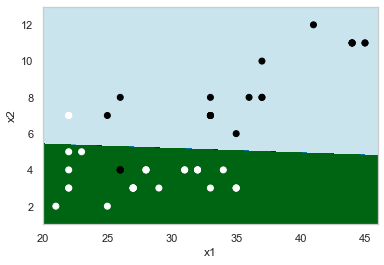

In [96]:
utils.plot_decision_boundary(lambda x: model.predict(x), X_test_plot, y_test)

## 2. K Nearest Neighbors ó K Vecinos Más Cercanos

In [97]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [98]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [99]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [100]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       127
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



## 3. Regresión Lineal.

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

Coefficients: 
 [0.01395978 0.06354815]
Mean squared error: 0.14
Variance score: 0.44


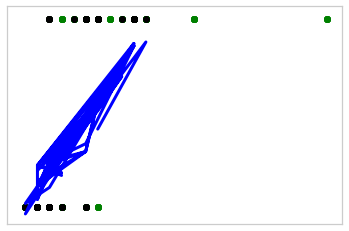

In [103]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Plot outputs
plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.plot(X_test['n_experience'], y_test_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 4. Regresión Logística.

In [104]:
model = SGDClassifier(loss="log", eta0=1, learning_rate="constant", penalty=None)

model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [106]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       1.00      0.51      0.68       127
         1.0       0.57      1.00      0.73        83

    accuracy                           0.70       210
   macro avg       0.79      0.76      0.70       210
weighted avg       0.83      0.70      0.70       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60        30
         1.0       0.57      1.00      0.73        23

    accuracy                           0.68        53
   macro avg       0.79      0.72      0.67        53
weighted avg       0.82      0.68      0.66        53



In [107]:
display(model.coef_)
bound = X_test.dot(model.coef_.T)
print(bound)

array([[-25.53551742, 238.89271143]])

               0
151  1247.218238
241  1819.756323
294    27.219164
137   154.896751
149   138.434288
26   1110.467597
109   163.969806
194  1504.257059
143  1478.721542
222  -177.064976
279    27.219164
147   138.434288
132   -58.460443
195  1504.257059
224  -177.064976
86    607.146656
228  -177.064976
70    632.682174
145   138.434288
121  1033.861044
199  1504.257059
92   -125.993941
261   829.576905
117   291.647393
106   163.969806
114   291.647393
32   1444.112970
19   1068.469616
271   240.576358
102   966.327547
28   1110.467597
287    27.219164
140  1478.721542
62    991.863064
30   1110.467597
4     -23.851871
118   291.647393
104   966.327547
238    87.363253
260   829.576905
262   829.576905
289    27.219164
257   829.576905
274   240.576358
139   154.896751
280    27.219164
215  -160.602513
80    393.789462
200  1504.257059
285    27.219164
116   291.647393
278   240.576358
265   539.613159


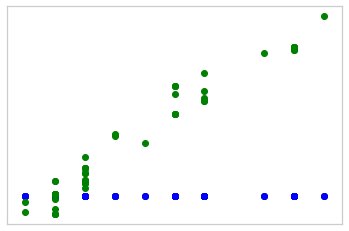

In [108]:
# Plot outputs
#plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.scatter(X_test['n_experience'], y_test_pred, color='blue')
plt.scatter(X_test['n_experience'],bound.T, color='green')


plt.xticks(())
plt.yticks(())

plt.show()

Param Grid aplicado sobre el modelo de Regresión Logística

In [109]:
param_grid = {
    'loss': ['log'],
    'penalty':['None', 'l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0':[0.00000001, 0.000001, 0.0001, 0.01]
}

## ParameterGrid

In [110]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
 #   print(params)
    model = SGDClassifier(**params, random_state=0)

## GridSearch
Análisis con GridSearch para regresión logística

In [111]:
from sklearn.model_selection import GridSearchCV

model = model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [112]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("loss\penalty\alpha\learning_rate\eta0\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['loss']}\t{p['penalty']}\t{p['alpha']}\t{p['learning_rate']}\t{p['eta0']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

loss\penaltylpha\learning_rate\eta0	| mean	std	rank
log	None	0.0001	constant	1e-08	| 0.60	0.00	31
log	l2	0.0001	constant	1e-08	| 0.60	0.00	31
log	None	0.0001	invscaling	1e-08	| 0.60	0.00	31
log	l2	0.0001	invscaling	1e-08	| 0.60	0.00	31
log	None	0.0001	adaptive	1e-08	| 0.60	0.00	31
log	l2	0.0001	adaptive	1e-08	| 0.60	0.00	31
log	None	0.0001	constant	1e-06	| 0.60	0.00	31
log	l2	0.0001	constant	1e-06	| 0.60	0.00	31
log	None	0.0001	invscaling	1e-06	| 0.60	0.00	31
log	l2	0.0001	invscaling	1e-06	| 0.60	0.00	31
log	None	0.0001	adaptive	1e-06	| 0.60	0.00	31
log	l2	0.0001	adaptive	1e-06	| 0.60	0.00	31
log	None	0.0001	constant	0.0001	| 0.84	0.04	13
log	l2	0.0001	constant	0.0001	| 0.84	0.04	13
log	None	0.0001	invscaling	0.0001	| 0.60	0.00	31
log	l2	0.0001	invscaling	0.0001	| 0.60	0.00	31
log	None	0.0001	adaptive	0.0001	| 0.83	0.04	19
log	l2	0.0001	adaptive	0.0001	| 0.83	0.04	19
log	None	0.0001	constant	0.01	| 0.75	0.08	25
log	l2	0.0001	constant	0.01	| 0.75	0.08	25
log	None	0.0001	invscaling	0.01

Los mejores modelos tienen un accuracy promedio del 0.06 con una stdv de 0.4, Sin usar función de pérdida, y con una tasa adaptativa de la learnning rate.


### Mezca Aleatória y División en Train/Test
Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# Observaciones de Trabajo
**No trabajaron con el dataset2**
Podemos darlo como válido pero justifiquen porque usaron ese dataset

* No hay una clara declaración de los puntos 1, 2, 3 y 4
* No usaron GridSearch para el modelo seleccionado

433: utils.plot_decision_boundary(lambda x: model.predict(x), Xtrain, y_train.T)
No graficaron  el test.

437: KNeighborsClassifier 
No graficaron.

# Aprendizaje Supervisado


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

In [114]:
dataset2

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13175  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13261  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13304  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13347  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

      skill_type                                          person_id  \
0          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
47         skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
94         skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
141        skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
188        skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
...          ...                                                ...   
13175      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13218      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13261      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13304      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13347      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

      person_name person_type person_category person_gender  person_age  \
0         Diego M      person          senior          male        35.0   
47       Fernando      person     semi-senior          male        28.0   
94        Diego M      person          senior          male        35.0   
141      Hernan U      person     semi-senior          male        22.0   
188     Luciano M      person          senior          male        26.0   
...           ...         ...             ...           ...         ...   
13175      Lionel      person     semi-senior          male        35.0   
13218      Daniel      person          senior          male        44.0   
13261      Daniel      person          senior          male        44.0   
13304      Lionel      person     semi-senior          male        35.0   
13347      Lionel      person     semi-senior          male        35.0   

       person_experience  ... SQL MariaDB Oracle Cloud  Redis  Azure  unix  \
0                   11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
47                   4.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
94                  11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
141                  7.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
188                  8.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
...                  ...  ...  ..     ...          ...    ...    ...   ...   
13175                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13218               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13261               11.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13304                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   
13347                3.0  ... NaN     NaN          NaN    NaN    NaN   NaN   

       S3  EC2  talend  neo4j  
0     NaN  NaN     NaN    NaN  
47    NaN  NaN     NaN    NaN  
94    NaN  NaN     NaN    NaN  
141   NaN  NaN     NaN    NaN  
188   NaN  NaN     NaN    NaN  
...    ..  ...     ...    ...  
13175 NaN  NaN     NaN    NaN  
13218 NaN  NaN     NaN    NaN  
13261 NaN  NaN     NaN    NaN  
13304 NaN  NaN     NaN    NaN  
13347 NaN  NaN     NaN    NaN  

[216 rows x 45 columns]

In [115]:
dataset3 = pd.get_dummies(dataset2, columns=['technology_name'])
dataset3

skill_id        skill_name  \
0      6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
47     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
94     6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
141    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
188    6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...    Data Scientist   
...                                                  ...               ...   
13175  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13218  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13261  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13304  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   
13347  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...  Technical Leader   

      skill_type                                          person_id  \
0          skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
47         skill  51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...   
94         skill  db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...   
141        skill  39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...   
188        skill  ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...   
...          ...                                                ...   
13175      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13218      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13261      skill  f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...   
13304      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   
13347      skill  bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...   

      person_name person_type person_category person_gender  person_age  \
0         Diego M      person          senior          male        35.0   
47       Fernando      person     semi-senior          male        28.0   
94        Diego M      person          senior          male        35.0   
141      Hernan U      person     semi-senior          male        22.0   
188     Luciano M      person          senior          male        26.0   
...           ...         ...             ...           ...         ...   
13175      Lionel      person     semi-senior          male        35.0   
13218      Daniel      person          senior          male        44.0   
13261      Daniel      person          senior          male        44.0   
13304      Lionel      person     semi-senior          male        35.0   
13347      Lionel      person     semi-senior          male        35.0   

       person_experience  ... technology_name_Spark technology_name_Vertica  \
0                   11.0  ...                     0                       0   
47                   4.0  ...                     0                       0   
94                  11.0  ...                     0                       0   
141                  7.0  ...                     0                       0   
188                  8.0  ...                     0                       0   
...                  ...  ...                   ...                     ...   
13175                3.0  ...                     0                       0   
13218               11.0  ...                     0                       0   
13261               11.0  ...                     0                       0   
13304                3.0  ...                     0                       0   
13347                3.0  ...                     0                       0   

       technology_name_java  technology_name_neo4j  technology_name_pentaho  \
0                         0                      0                        0   
47                        0                      0                        0   
94                        0                      0                        0   
141                       0                      0                        0   
188          

In [116]:
dataset3 = dataset3.groupby('person_id').max()
dataset3

skill_id  \
person_id                                                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  

# Dataset para Problema de Clasificación Múltiple
Ahora encararemos nuestro problema original es uno de clasificación múltiple,  en donde nuestro objetivo será usar la variable person_category:

1 = person_category = junior

2 = person_category = semi-senior

3 = person_category = senior


Es decir, queremos predecir el perfil de las personas. En base a esta definición.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

In [117]:
#Primero generamos una función para pasar los valores a numéricos:
mapper = {"semi-senior":2,
                  "senior":3,
                  "junior":1,}

dataset3['person_category'] = dataset3['person_category'].replace(mapper)


In [118]:
dataset3

skill_id  \
person_id                                                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...  720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...  4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...  7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...  

In [119]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [120]:
valid_columns = ['person_category', 'person_age', 'person_experience',
       'technology_name_AWS Lambda', 'technology_name_Azure',
       'technology_name_Docker', 'technology_name_EC2',
       'technology_name_Golden Gate', 'technology_name_Google cloud',
       'technology_name_Hadoop', 'technology_name_Kubernetes',
       'technology_name_Linux', 'technology_name_MariaDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_talend',
       'technology_name_unix', 'technology_name_windows']

In [121]:
df = dataset3.drop(columns =['skill_id',
                             'skill_name',
                             'skill_type', 'person_name', 'person_type', 'person_gender', 
       'technology_id', 'technology_type', 'AWS Lambda', 'phyton', 'Docker','scala', 'AWS', 'MongoDB',
       'Kubernetes', 'Linux', 'Spark', 'MySQL', 'SQL Server', 'R', 'Vertica',
       'ODI', 'windows', 'Golden Gate', 'Oracle', 'Oracle Cloud', 'SQL',
       'java', 'pentaho', 'Hadoop', 'MariaDB', 'Redis', 'Azure',
       'Google cloud', 'PostgreSQL', 'unix', 'S3', 'EC2', 'talend', 'neo4j'])

In [122]:
df

person_category  \
person_id                                                             
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                3   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                2   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                1   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                1   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                1   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                3   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                1   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                2   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                2   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                2   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                2   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                2   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                3   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                3   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                3   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                3   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                2   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                1   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                3   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                3   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                1   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                3   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                2   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                1   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                2   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                1   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                1   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                3   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                3   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                3   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                3   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                2   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                1   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                3   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                3   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                2   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                3   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                3   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                1   

                                                    person_age  \
person_id                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...        36.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...        23.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...        39.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...        25.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        24.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...        42.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...        39.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...        33.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...        28.0  

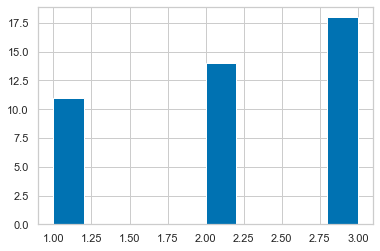

In [123]:
df.person_category.hist()

**BALANCE DE CLASES**: las clases 2 y 3 estan balanceadas, pero dado los pocos datos, la clase 1 no, ya que tiene un 61% de la clase 3.

### Mezca Aleatória y División en Train/Test
Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: X_train, X_test, y_train y y_test.


## CONSULTA: ¿porque AMBOS datasets?

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X, y = df.drop(columns=['person_category']), df['person_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
X_train.shape, X_test.shape

((34, 34), (9, 34))

In [126]:
X.drop(columns=[])

person_age  \
person_id                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...        36.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...        23.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...        39.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...        25.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        24.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...        42.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...        39.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...        33.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...        28.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...        27.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...        34.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...        32.0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...        25.0   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...        35.0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...        37.0   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...        33.0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...        34.0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...        22.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...        34.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...        31.0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...        41.0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...        45.0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...        21.0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...        41.0   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...        35.0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...        33.0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...        23.0   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...        29.0   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...        38.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...        35.0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...        45.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...        26.0   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...        33.0   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...        22.0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...        22.0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...        44.0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...        26.0   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...        27.0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...        52.0   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...        37.0   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...        24.0   

                                                    person_experience  \
person_id                                                               
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                8.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                5.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                5.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                2.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                3.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                4.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                9.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                2.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                2.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                4.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                3.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...         

In [127]:
#sns.pairplot(df,  hue="person_category", diag_kind = "hist")
#plt.savefig("Histotodo.jpg")

In [128]:
firstcolumns=['person_category','person_age','person_experience','technology_name_EC2','technology_name_Spark','technology_name_Vertica']

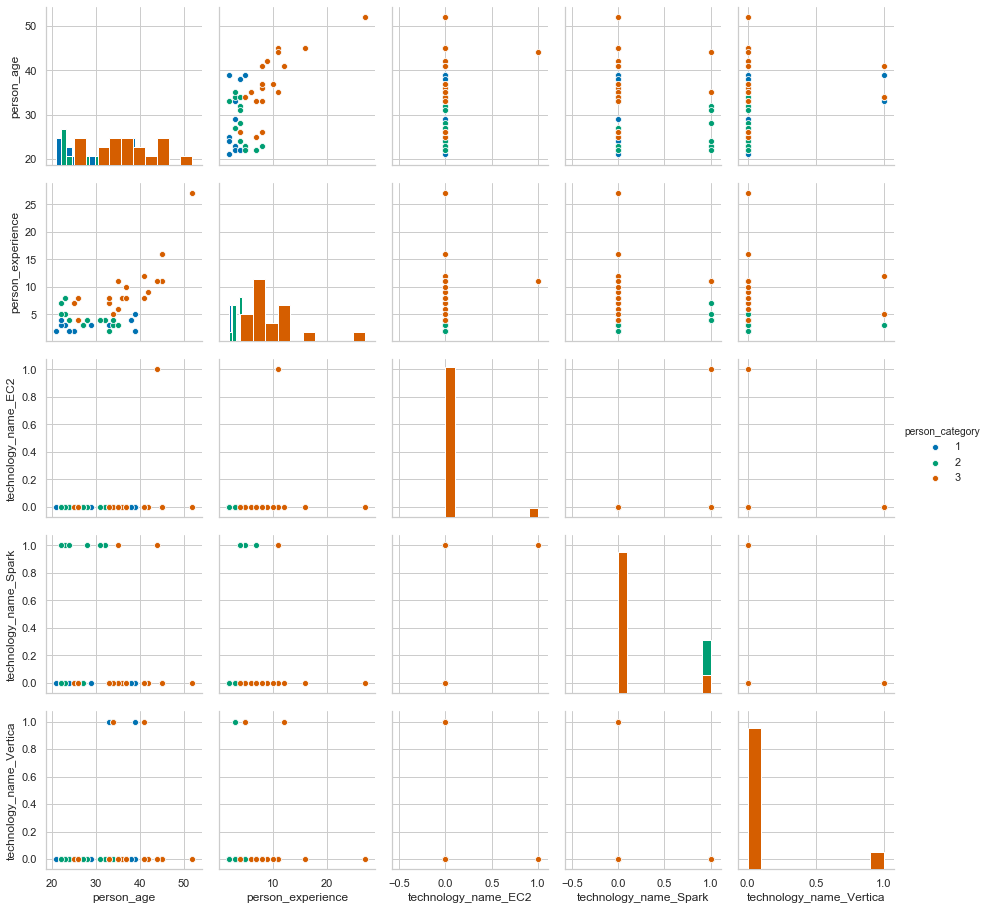

In [129]:
sns.pairplot(df[firstcolumns], hue="person_category", diag_kind = "hist")
#plt.savefig("Correlaciones Pearson.jpg")

##Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para el dataset seleccionado, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean adecuado.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:

* Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
* Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

* Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
  * Accuracy o exactitud
  * Reporte de clasificación
  * Confusion matrix o matriz de confusión (graficar como heatmap)
  * Curva ROC y área bajo la curva (AUC).
* Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?
### Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.


## SVM

In [130]:
from sklearn.svm import SVC
%matplotlib inline

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
import utils

In [131]:
svm = SVC( 
        C=1.0, 
        kernel='rbf', 
        degree=3, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        break_ties=False, 
        random_state=None
        )

In [132]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
svm.predict(X_test)

array([3, 2, 3, 2, 2, 3, 2, 2, 3], dtype=int64)

In [134]:
y_test

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64

El SVM predijo correctamente 5 de 9 puntos.

In [135]:
svm.score(X_test, y_test, sample_weight=None)

0.5555555555555556

GRÁFICO: No se puede, es 36 dimensional.

In [136]:
#utils.plot_decision_boundary(lambda x: svm.predict(X_test_plot), X_test_plot, (y_test[1],y_test[2]))
#predictions = svm.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Vector de BIAS: En este caso el parámetro de regularización es el "C", que utiliza una penalidad cuadrádtica l2. Para optimizarlo usamos gridsearch.

## RANDOM FOREST

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(X_test)
print(y_test)

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64


In [138]:
clf.score(X_test, y_test, sample_weight=None)

0.6666666666666666

Este modelo predice bien el 100% de los casos. Por ende y por el mismo diseó del algoritmo, no vemos necesidad de optimización a primera vista. De todas maneras para cumplir con la consigna, si resultase ser el modelo elegido se lo procesará según lo indicado.

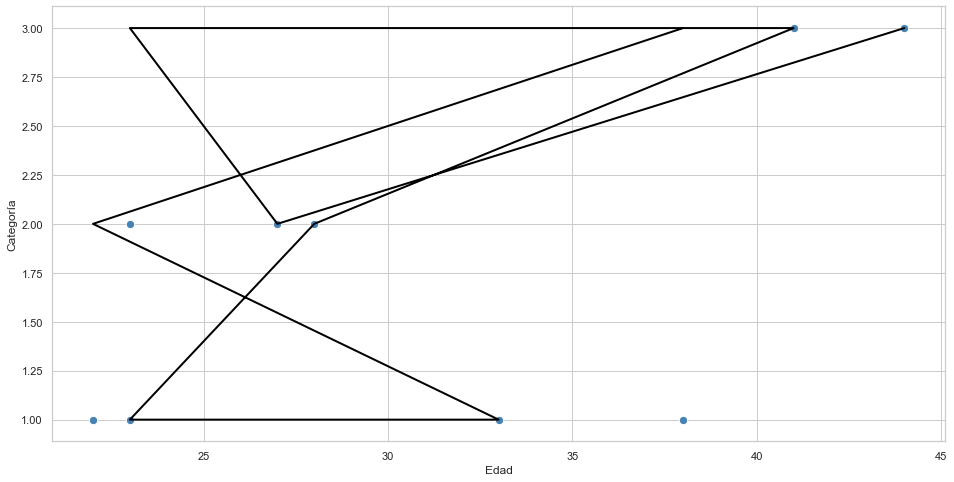

In [139]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test['person_age'], y_test, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_test['person_age'], clf.predict(X_test),
         color='black', lw=2)
plt.xlabel('Edad')
plt.ylabel('Categoría')
plt.show()

## NEURAL NETWORK

In [140]:
from sklearn import neural_network
import matplotlib.pyplot as plt

In [141]:
clf = neural_network.MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(5, 2), 
    random_state=1, 
    max_iter=5000
)

In [142]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [143]:
clf.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [144]:
clf.score(X_test, y_test)

0.2222222222222222

La Red Neuronal tuvo el **peor** resultado de los modelos, prediciendo solo un tercio de los casos.

## Selección del modelo

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

Descripción de la Hipótesis ¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

Selección de Regularizador ¿Utilizarán algún regularizador?¿Cuál?

Selección de Función de Costo ¿Cuál será la función de costo utilizada?

Justificación de las Selecciones ¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning). Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?


**Hipótesis**: El problema es clasificar el seniority de las personas, medido a través de "person_category", en función de la cantidad de tecnologías conocidas principalemente. La hipótesis nula es que a mayor número de tecnologías conocidas, mayor será la seniority. Adicionalmente se puede contemplar los años de experiencia de trabajo de cada individuo, siendo un factor clave para determinar el nivel de seniority.

**Selección de Regulizador**: los regulizadores tienen sentido en los modelos lineales, para evitar el overfitting de los modelos que lleva a la pérdida de capacidad predictiva fuera de la muestra de entrenamiento. Dado que se opta por un random forest esto se puede atacar desde varios parámetros del modelo. Para empezar, se puede determinar la profundidad máxima que puede tener cada árbol envitando el overfit. También es posible determinar el número mínimo de muestras para poder generar un split, si por ejemplo ese número es 10, no se podrá generar un nuevo split si se llega a una hoja con menos de ese número de datos. Otra forma de verlo, es poniendo un mínimo al número de muestras remanentes que quedarán en cada hoja final. Todos estos parámetros pueden ser optimizado con el uso de GridSearch

**Selección de Función de Costo**: Para el caso de Random Forest las funciones de costo pueden ser GINI o ENTROPIA. El costo de GINI es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. , mientras que el de entropía es una medida de ganancia de información. Ambos serán evaluados a través de la optimización con GridSearch.

**Justificación**: Seleccionamos este modelo porque trás correr las primeras pruebas, parece ser el que mejor uso hace de las dummies de tecnología para poder generar la clasificación.

In [145]:
rfc = RandomForestClassifier(random_state=0)

param_grid = { 
    'criterion':('gini', 'entropy'),
    'max_depth': (2, 3, 4),
    'min_samples_leaf':(1, 2, 3),
    'min_samples_split':(2, 3, 5)
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

CV_rfc.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [146]:
CV_rfc.best_score_

0.7206349206349206

In [147]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
y_predicted = CV_rfc.best_estimator_.predict(X_test)

In [149]:
import sklearn.metrics as metrics

In [150]:
metrics.confusion_matrix(y_test, y_predicted)

array([[4, 0, 0],
       [0, 2, 1],
       [0, 0, 2]], dtype=int64)

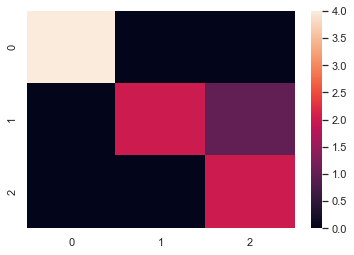

In [151]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted))

In [152]:
'''
metrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)
plt.show()     
'''

'\nmetrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)\nplt.show()     \n'

Las curvas ROC no se pueden graficar en virtud de que estamos en un problema de clasificación multiclase. Para poder utilizar esta herramienta debe generarse un problema de clasificación binario del tipo 1 vs all.

Respecto a si es correcto utilizar Accuracy, Recall o una mezcla de ambas como métrica, nos inclinamos por Balanced Accuracy dado que queremos mejorar la precisión de las etiquetas pero dentro de un dataset desbalanceado.

In [153]:
metrics.balanced_accuracy_score(y_test, y_predicted)

0.8888888888888888

La métrica llega a un valor óptimo.

## Aprendizaje No Supervisado

Nos concetraremos en intentar encontrar las tecnologías que determinan a un "Data Scientist", y luego intentaremos montar un sistema de recomendación de tecnologías para que los recursos humanos puedan formarse como científicos de datos.

In [154]:
skills = df.drop(columns=['person_category', 'person_age', 'person_experience'])

In [155]:
# Create correlation matrix
corr_matrix = skills.corr().abs()

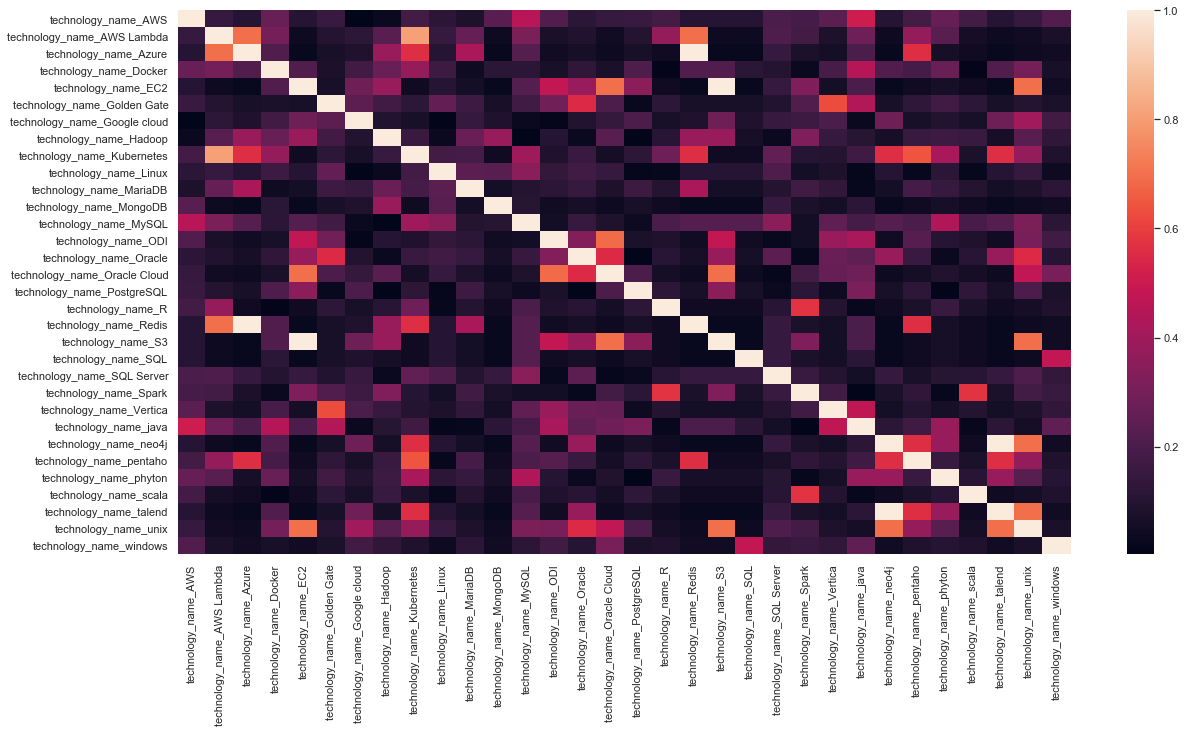

In [156]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

A priori, no se ven relaciones claras entre diferentes tecnologías.

¿Que skills tienen los Data Scientists?

In [157]:
data_scientists = dataset3[dataset3['skill_name']=='Data Scientist']
data_scientists

skill_id  \
person_id                                                                                               
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   

                                                        skill_name skill_type  \
person_id                                                                       
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  Data Scientist      skill   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  Data Scientist      skill   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  Data Scientist      skill   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  Data Scientist      skill   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  Data Scientist      skill   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  Data Scientist      skill   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  Data Scientist      skill   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  Data Scientist      skill   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  Data Scientist      skill   

                                                   person_name person_type  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...      Hugo S      person   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...    Hernan U      person   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...    Natali L      person   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...    Fernando      person   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...   Mariana T      person   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...      Martin      person   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...   Gustavo M      person   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...     Diego M      person   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...   Luciano M      person   

                                                    person_category  \
person_id                                                             
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                2   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                2   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                2   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                3   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                3   

                                                   person_gender  person_age  \
person_id                                                                      
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...          male        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...          male        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        female        24.0   
5128

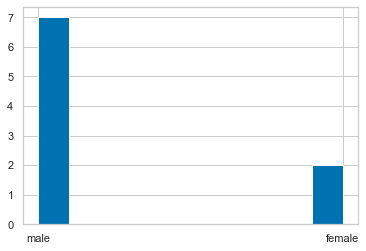

In [158]:
data_scientists['person_gender'].hist()

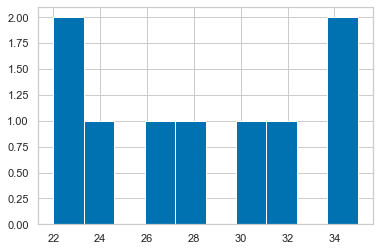

In [159]:
data_scientists['person_age'].hist()

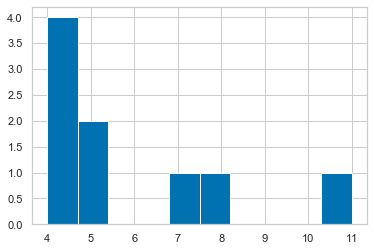

In [160]:
data_scientists['person_experience'].hist()

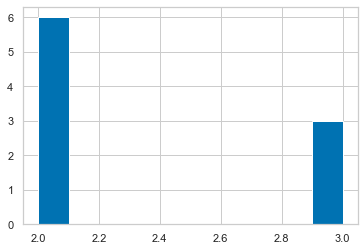

In [161]:
data_scientists['person_category'].hist()

Los Data Scientist son mayormente hombres, con experiencia entre semi-senior o senior. No hay Juniors DS.

In [162]:
means = dataset3.groupby('skill_name').mean()
means = means[['person_category','person_age','person_experience', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']]
means

person_category  person_age  person_experience  \
skill_name                                                         
DBA                      2.111111   34.666667           5.555556   
Data Scientist           2.333333   28.333333           5.777778   
Developer                1.894737   30.684211           6.263158   
Technical Leader         2.833333   37.833333           7.833333   

                  technology_name_AWS  technology_name_AWS Lambda  \
skill_name                                                          
DBA                          0.222222                    0.000000   
Data Scientist               0.222222                    0.111111   
Developer                    0.368421                    0.052632   
Technical Leader             0.333333                    0.000000   

                  technology_name_Azure  technology_name_Docker  \
skill_name                                                        
DBA                            0.000000                0.333333   
Data Scientist                 0.000000                0.222222   
Developer                      0.052632                0.368421   
Technical Leader               0.000000                0.500000   

                  technology_name_EC2  technology_name_Golden Gate  \
skill_name                                                           
DBA                          0.000000                     0.777778   
Data Scientist               0.000000                     0.000000   
Developer                    0.000000                     0.000000   
Technical Leader             0.166667                     0.000000   

                  technology_name_Google cloud  ...  technology_name_Spark  \
skill_name                                      ...                          
DBA                                   0.000000  ...               0.000000   
Data Scientist                        0.222222  ...               0.777778   
Developer                             0.315789  ...               0.000000   
Technical Leader                      0.333333  ...               0.166667   

                  technology_name_Vertica  technology_name_java  \
skill_name                                                        
DBA                              0.444444              0.333333   
Data Scientist                   0.111111              0.666667   
Developer                        0.000000              0.684211   
Technical Leader                 0.000000              0.833333   

                  technology_name_neo4j  technology_name_pentaho  \
skill_name                                                         
DBA                            0.000000                 0.111111   
Data Scientist                 0.000000                 0.000000   
Developer                      0.000000                 0.052632   
Technical Leader               0.166667                 0.166667   

                  technology_name_phyton  technology_name_scala  \
skill_name                                                        
DBA                             0.000000               0.000000   
Data Scientist                  0.222222               0.333333   
Developer                       0.157895               0.000000   
Technical Leader                0.166667               0.000000   

                  technology_name_talend  technology_name_unix  \
skill_name                                                       
DBA                             0.000000              0.000000   
Data Scientist                  0.000000              0.000000   
Developer                       0.000000              0.000000   
Technical Leader                0.166667              0.333333   

                  technology_name_windows  
skill_name                                 
DBA                              0.222222  
Data Scientist                   0.000000  
Developer                        0.105263  
Technical Leader                 0.000000  

[4 rows x 35 columns]

## NEED SOME HELP WITH THE NEXT GRAPH:

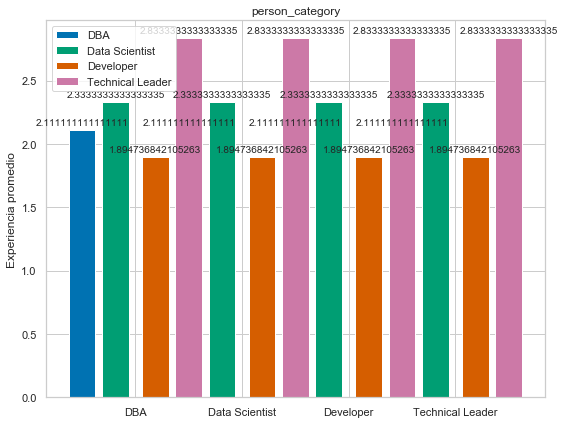

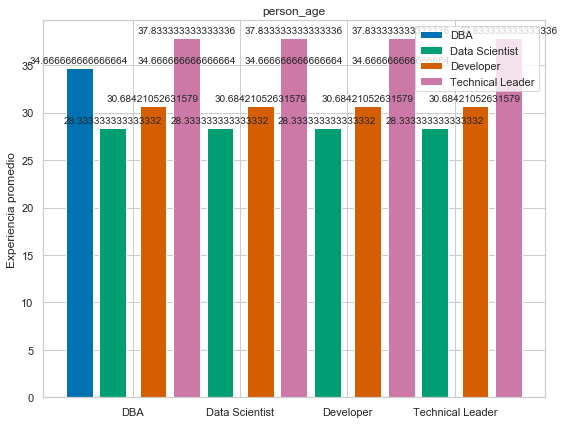

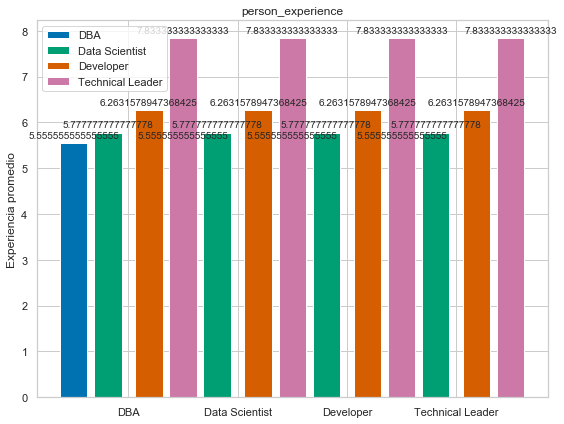

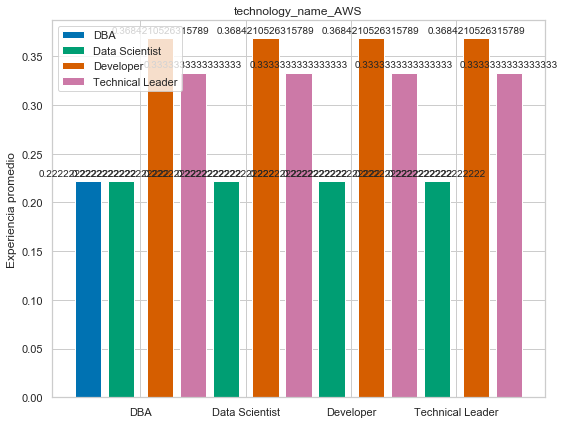

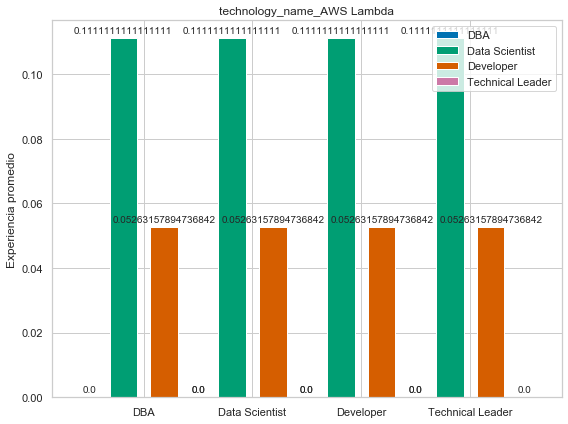

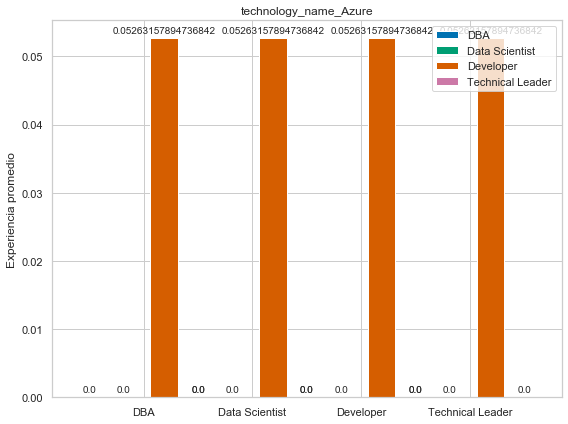

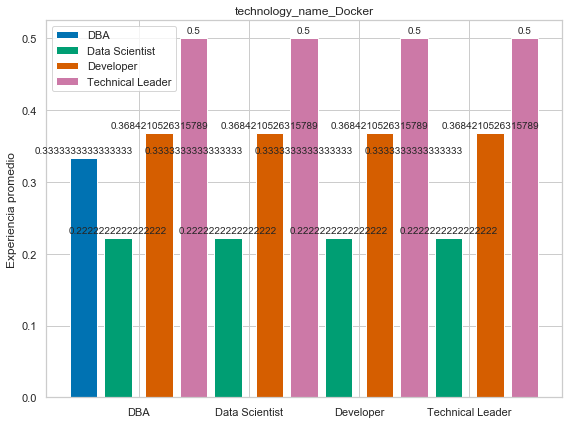

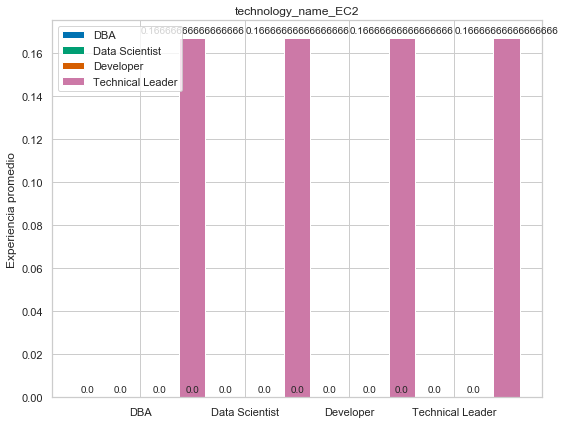

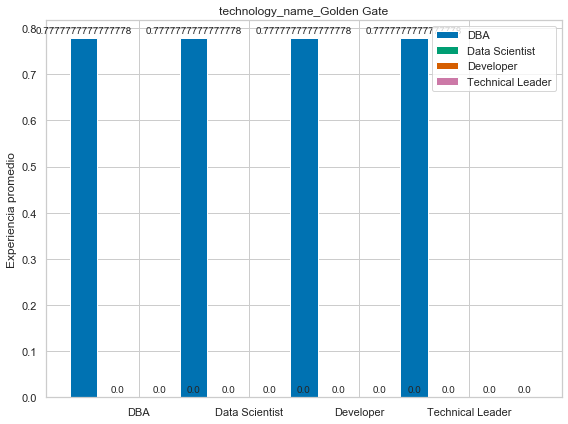

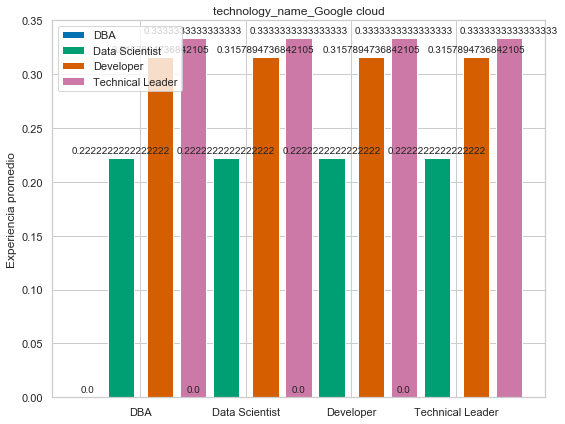

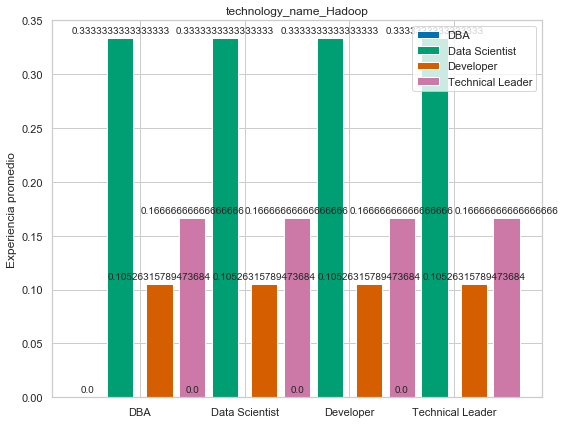

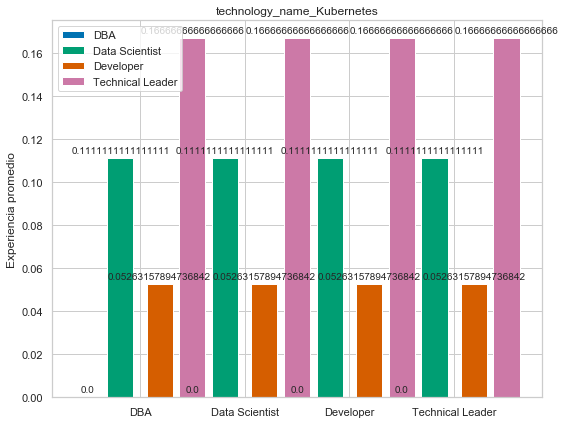

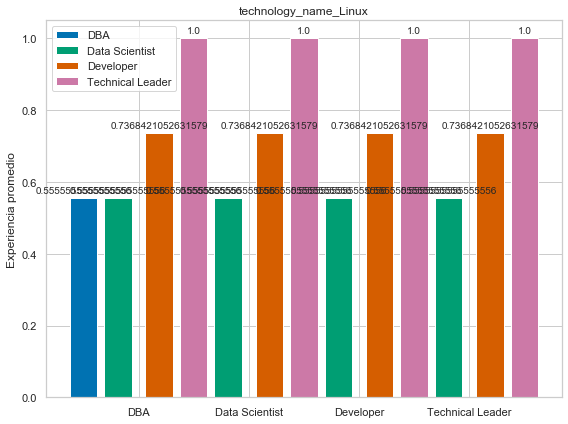

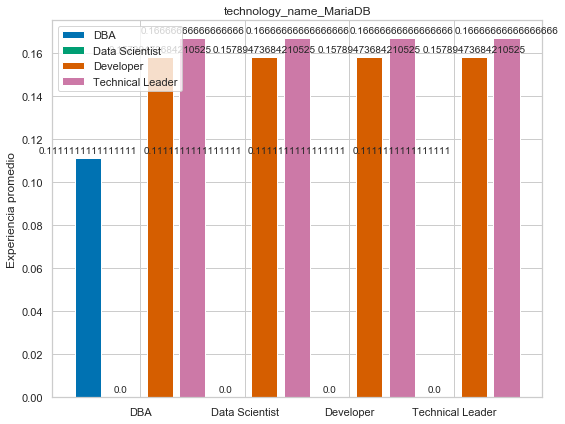

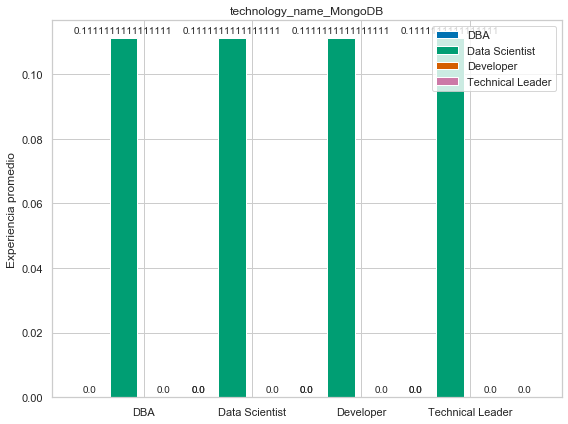

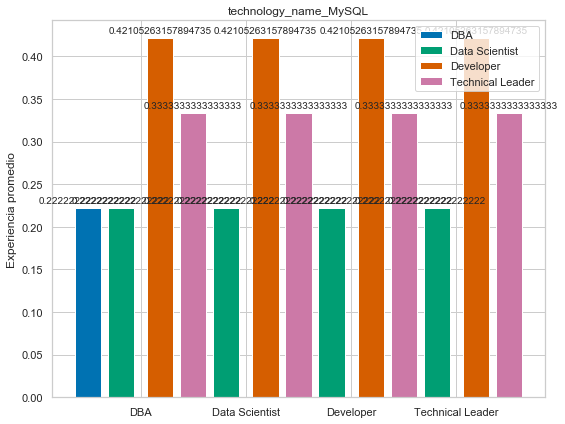

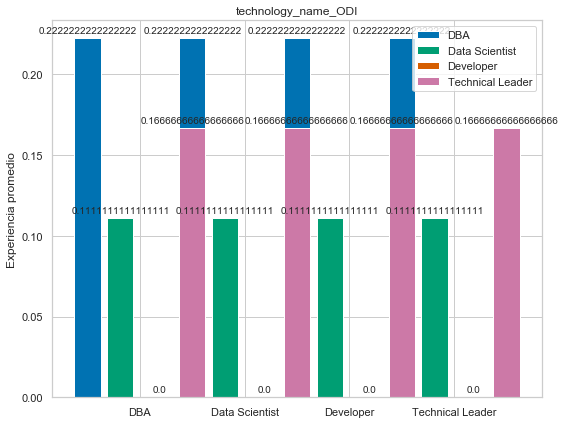

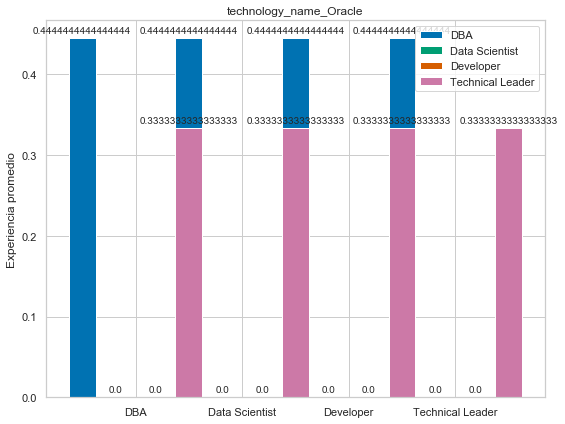

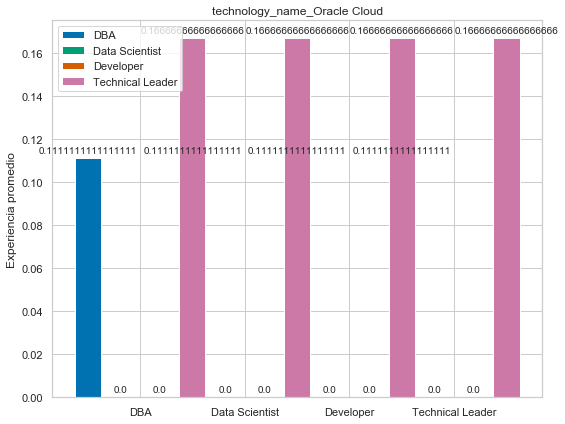

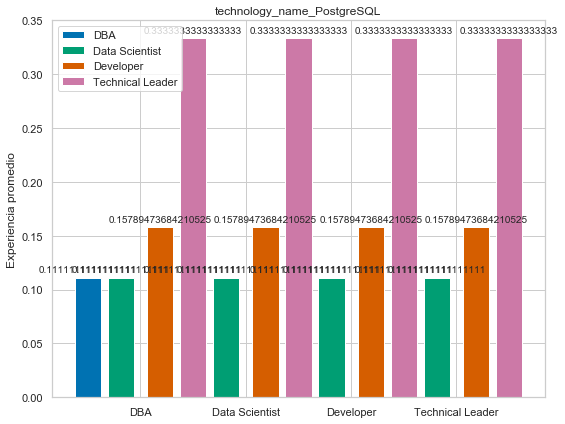

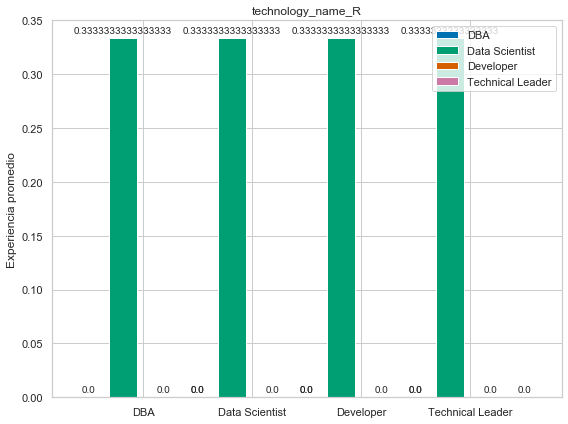

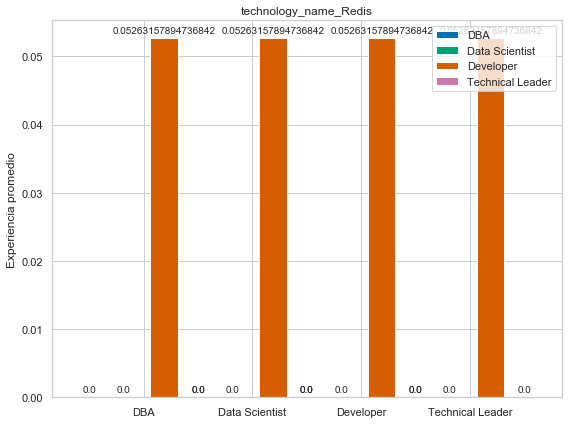

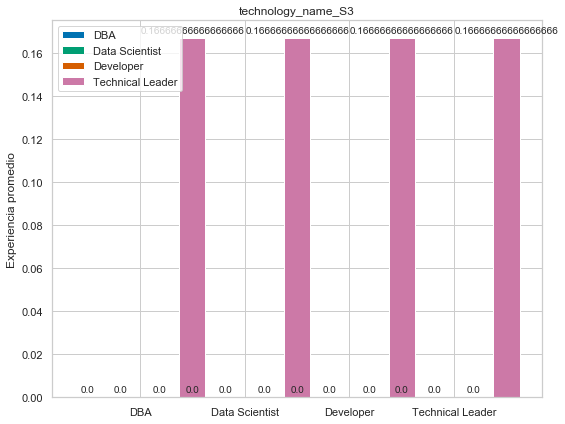

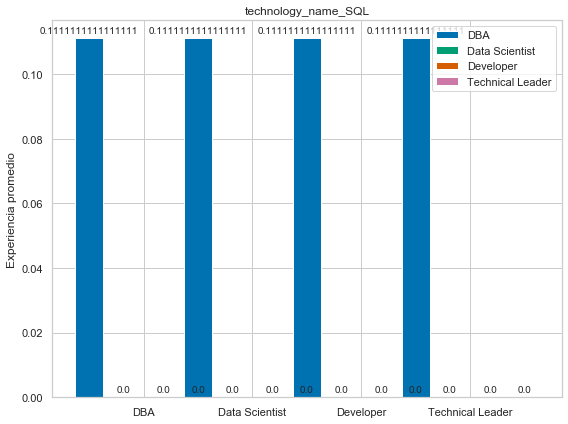

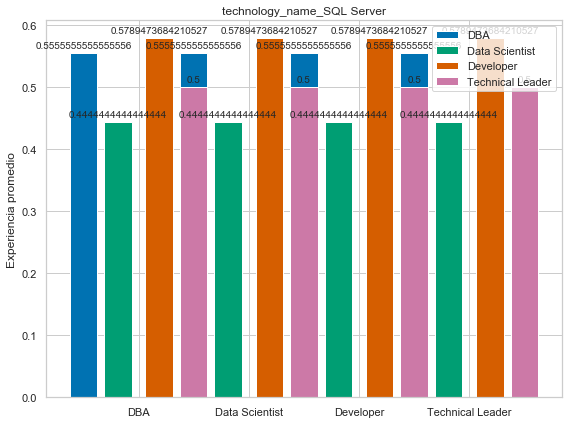

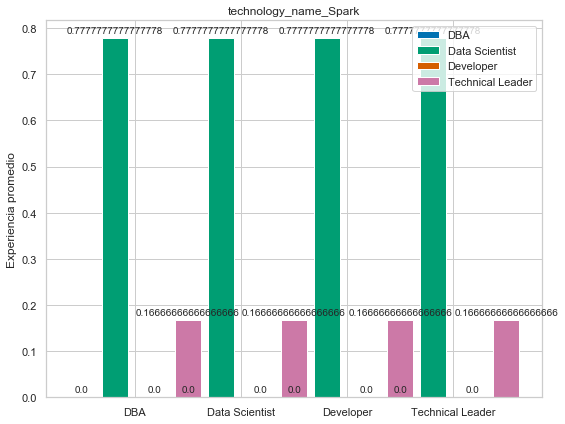

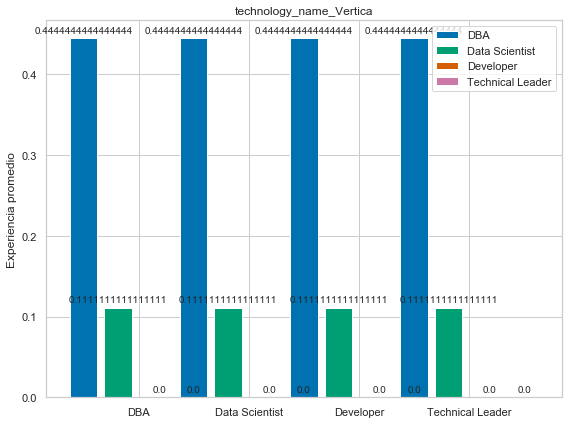

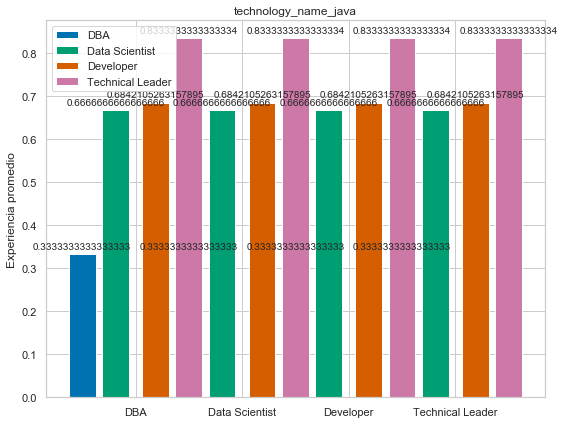

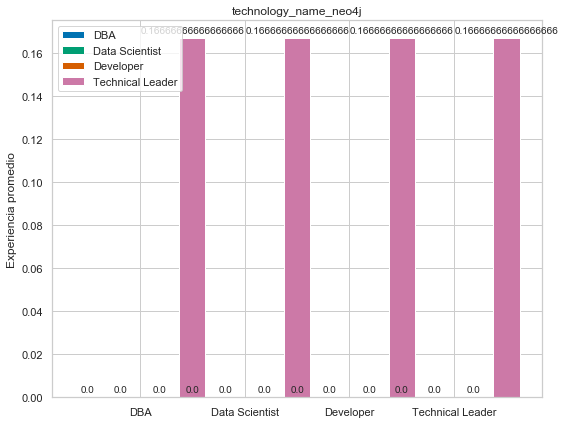

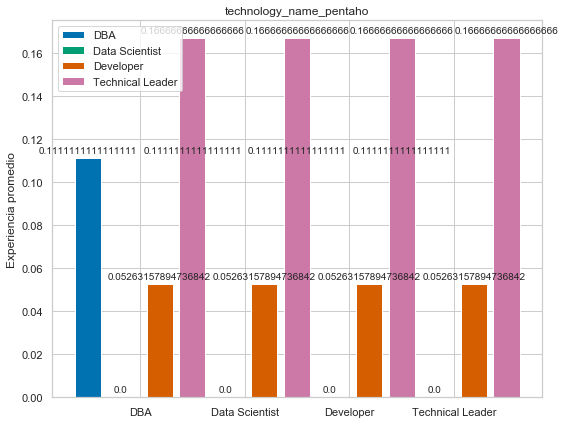

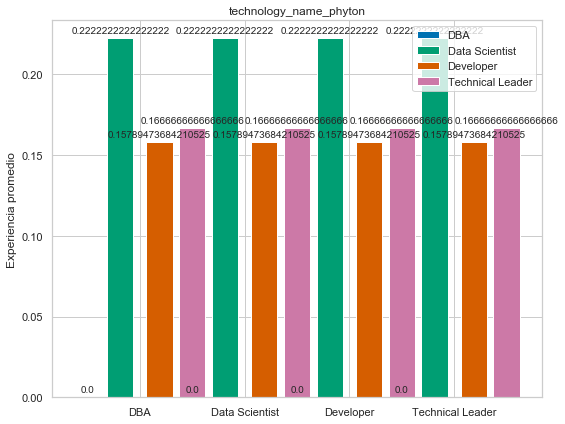

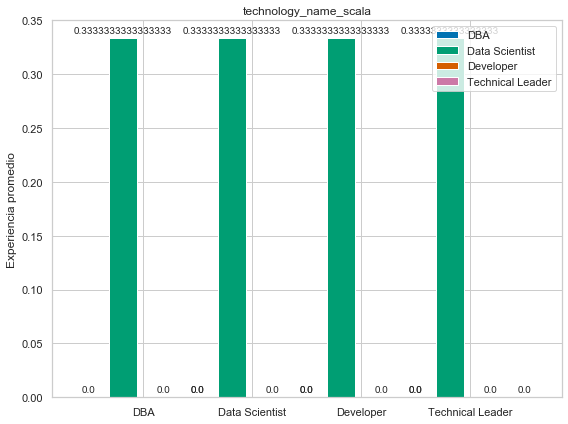

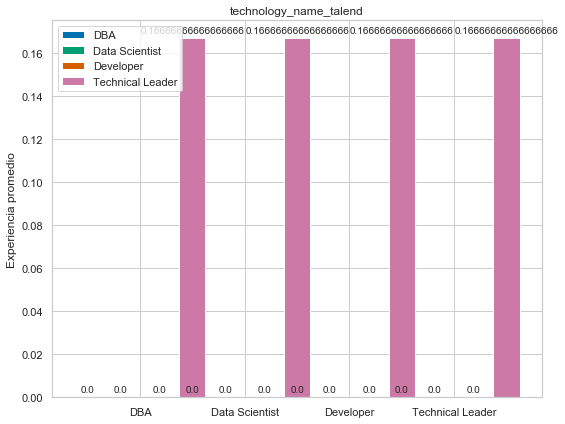

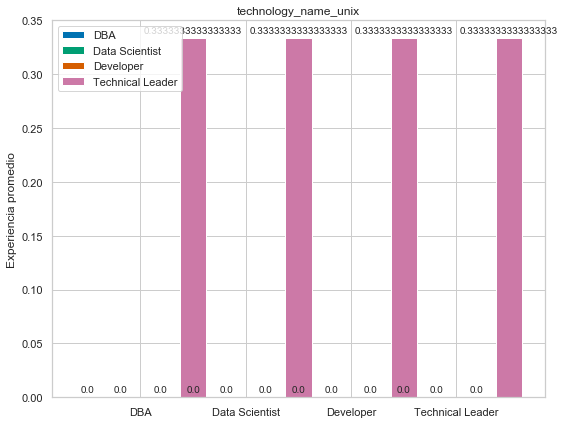

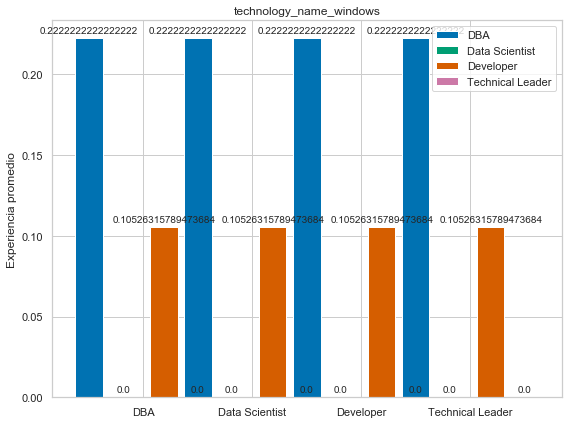

In [163]:
for c in means.columns:

    labels = list(means.index)
    dba_means = means[c].loc['DBA']
    ds_means = means[c].loc['Data Scientist']
    dev_means = means[c].loc['Developer']
    tl_mean = means[c].loc['Technical Leader']

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,6))
    rects1 = ax.bar(x - 2 * width, dba_means, width, label='DBA')
    rects2 = ax.bar(x - 0.75 * width, ds_means, width, label='Data Scientist')
    rects3 = ax.bar(x + 0.75 *width, dev_means, width, label='Developer')
    rects4 = ax.bar(x + 2* width, tl_mean, width, label='Technical Leader')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Experiencia promedio')
    ax.set_title(c)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

In [164]:
skills.columns

Index(['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows'],
      dtype='object')

In [165]:
techs = data_scientists[['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']].sum()
techs

technology_name_AWS             2
technology_name_AWS Lambda      1
technology_name_Azure           0
technology_name_Docker          2
technology_name_EC2             0
technology_name_Golden Gate     0
technology_name_Google cloud    2
technology_name_Hadoop          3
technology_name_Kubernetes      1
technology_name_Linux           5
technology_name_MariaDB         0
technology_name_MongoDB         1
technology_name_MySQL           2
technology_name_ODI             1
technology_name_Oracle          0
technology_name_Oracle Cloud    0
technology_name_PostgreSQL      1
technology_name_R               3
technology_name_Redis           0
technology_name_S3              0
technology_name_SQL             0
technology_name_SQL Server      4
technology_name_Spark           7
technology_name_Vertica         1
technology_name_java            6
technology_name_neo4j           0
technology_name_pentaho         0
technology_name_phyton          2
technology_name_scala           3
technology_nam

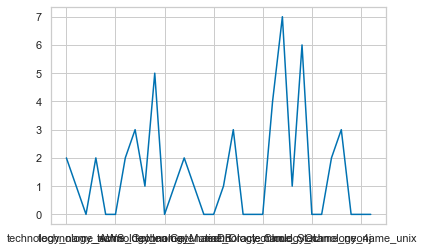

In [166]:
techs.plot()

In [167]:
'''
Sabemos que hay 4 potenciales clusters optimos, por los tipos de perfiles. Intentaremos agruparlos según las tecnologías que cada uno conoce.
'''

dataset3.skill_name.unique()

array(['Technical Leader', 'Data Scientist', 'DBA', 'Developer'],
      dtype=object)

In [168]:
# Buscamos los clusters para los jugadores

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  96.87142857142858


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

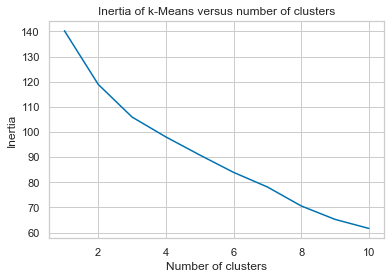

In [169]:
# Buscamos el hiperparámetro 'n_clusters', variando de 1 a 11 clusters

#Metemos la función scores dentro del grafico
scores = [KMeans(n_clusters=i+1).fit(skills).inertia_ for i in range(10)]
#+1 para que empiece del cluster 1 ya que range(10) va de 0 a 10

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# El conjunto de jugadores tendria 4 clusters

In [170]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.express as px

In [171]:
#Graficamos los grupos generados por los clusters

skill_1='technology_name_java'
skill_2='technology_name_Spark'

kmean_clusters = go.Scatter(
    x=skills[skill_1], 
    y=skills[skill_2],
    mode='markers',
    text=dataset3['skill_name'],
    marker=dict(
        size=5,
        color = clusters.astype(np.float), #set color equal to a variable
        colorscale='Portland',
        showscale=False
        )
    )

data=[kmean_clusters]

layout = go.Layout(
    title="Clustering K means ",
    titlefont=dict(size=20),
    xaxis=dict(title=skill_1),
    yaxis=dict(title=skill_2),
    autosize=False, 
    width=600,height=600
)

fig = go.Figure(
    data=data,
    layout=layout
    )

plot(fig)

'temp-plot.html'

KMeans no arroja buenos resultados en el dataframe plano.

Ingeniería de Datos: intentaremos darle valor de experiencia a las tecnologías conocidas.

In [172]:
skills

technology_name_AWS  \
person_id                                                                 
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                    0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                    0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                    0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                    0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                    1   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                    0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                    1   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                    0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                    0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                    0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                    0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                    0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                    1   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                    0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                    1   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                    0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                    0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                    0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                    0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                    0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                    0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                    0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                    0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                    1   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                    0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                    0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                    1   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                    1   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                    1   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                    0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                    1   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                    1   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                    0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                    0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                    0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                    1   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                    0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                    1   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                    1   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                    0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                           0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                           0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                           0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                           0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                           0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                           0   
3c6052e0f7e58eca265f

In [173]:
exp = np.asarray(df['person_experience'])
len(exp)

43

In [174]:
skills2 = skills.multiply(exp, axis='rows', level=None, fill_value=None)
skills2

technology_name_AWS  \
person_id                                                                 
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                  0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                  0.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                  0.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f...                  0.0   
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f...                  2.0   
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e7...                  0.0   
55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f...                  7.0   
6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e7...                  0.0   
6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f...                  8.0   
79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e7...                  0.0   
822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f...                  0.0   
87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                  0.0   
a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f...                  0.0   
a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f...                  0.0   
ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f...                  0.0   
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f...                  8.0   
bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f...                  0.0   
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f...                  0.0   
c720cbe09318399805229024f20a1822-c81e728d9d4c2f...                  8.0   
d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f...                  3.0   
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f...                  4.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f...                  0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                  8.0   
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f...                  8.0   
f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f...                  0.0   
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f...                  0.0   
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f...                  0.0   
f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f...                  4.0   
f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e7...                  0.0   
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f...                 27.0   
f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f...                 10.0   
f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f...                  0.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f...                         0.0   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f...                         0.0   
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f...                         0.0   
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f...                         0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                         0.0   
3c6052e0f7e58eca265f

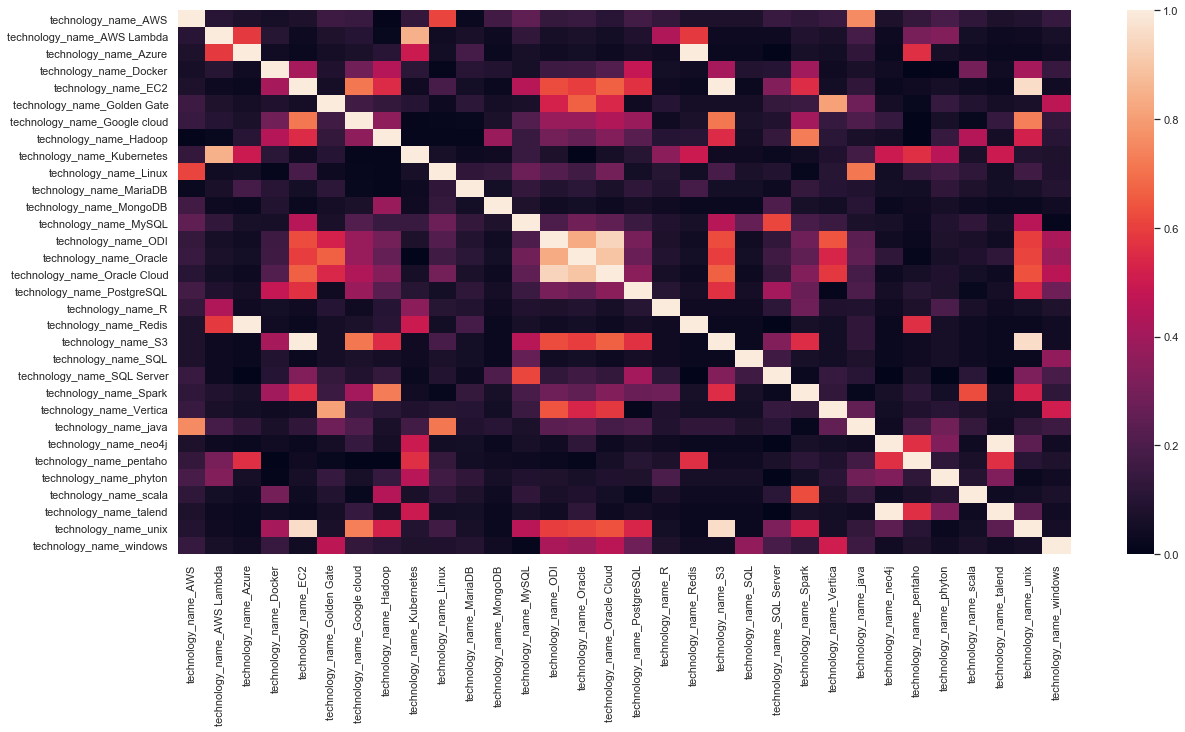

In [175]:
# Create correlation matrix
corr_matrix = skills2.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

Esta visión nos permite ver mejores agrupaciones, pero no radicalmente mejores. Permite mejorar el KMeans, pero aun los resulados no son los mejores.

In [176]:
skills2.sum()

technology_name_AWS             104.0
technology_name_AWS Lambda        7.0
technology_name_Azure             3.0
technology_name_Docker           86.0
technology_name_EC2              11.0
technology_name_Golden Gate      35.0
technology_name_Google cloud     43.0
technology_name_Hadoop           44.0
technology_name_Kubernetes       10.0
technology_name_Linux           199.0
technology_name_MariaDB          28.0
technology_name_MongoDB           8.0
technology_name_MySQL            70.0
technology_name_ODI              31.0
technology_name_Oracle           38.0
technology_name_Oracle Cloud     23.0
technology_name_PostgreSQL       44.0
technology_name_R                12.0
technology_name_Redis             3.0
technology_name_S3               11.0
technology_name_SQL               7.0
technology_name_SQL Server      128.0
technology_name_Spark            50.0
technology_name_Vertica          28.0
technology_name_java            186.0
technology_name_neo4j             3.0
technology_n

Aquí podemos ver las skills más importantes para los data scientist pesadas por experiencia.

In [177]:

exp = np.asarray(data_scientists['person_experience'])
len(exp)
skills_ds = data_scientists.iloc[:,43:].multiply(exp, axis='rows', level=None, fill_value=None)
skills_ds

technology_name_AWS  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                  0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                  8.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                         0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                         0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                         4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                         0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                         0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                         0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                         0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                         0.0   

                                                    technology_name_Azure  \
person_id                                                                   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                    0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                    0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                    0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                    0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                    0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                    0.0   

                                                    technology_name_Docker  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                     0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                     0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                     0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                     4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                     0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                     0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                     0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    11.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                     0.0   

                                                    technology_name_EC2  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282

In [178]:
clue = skills_ds.sum()
clue

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Azure            0.0
technology_name_Docker          15.0
technology_name_EC2              0.0
technology_name_Golden Gate      0.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MariaDB          0.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_Oracle           0.0
technology_name_Oracle Cloud     0.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_Redis            0.0
technology_name_S3               0.0
technology_name_SQL              0.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_neo4j            0.0
technology_name_pentaho          0.0
t

A partir de acá conocemos las tecnologías conocidas por los data scientists pesadas por experiencia.

Probamos con ideas de https://github.com/eflegara/NetStruc

In [180]:
try:
    ## For Network Analysis and Visualization
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from collections import defaultdict
    import operator

    ## For Hierarchical Clustering
    from scipy.cluster import hierarchy
    from scipy.spatial import distance
    
    ## For Community Detection (Louvain Method)
    #import community
    import unicodecsv as csv
    
except:
    import traceback
    traceback.print_exc()
    raise ImportError('Something failed, see above.')

In [181]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

<class 'networkx.classes.graph.Graph'>


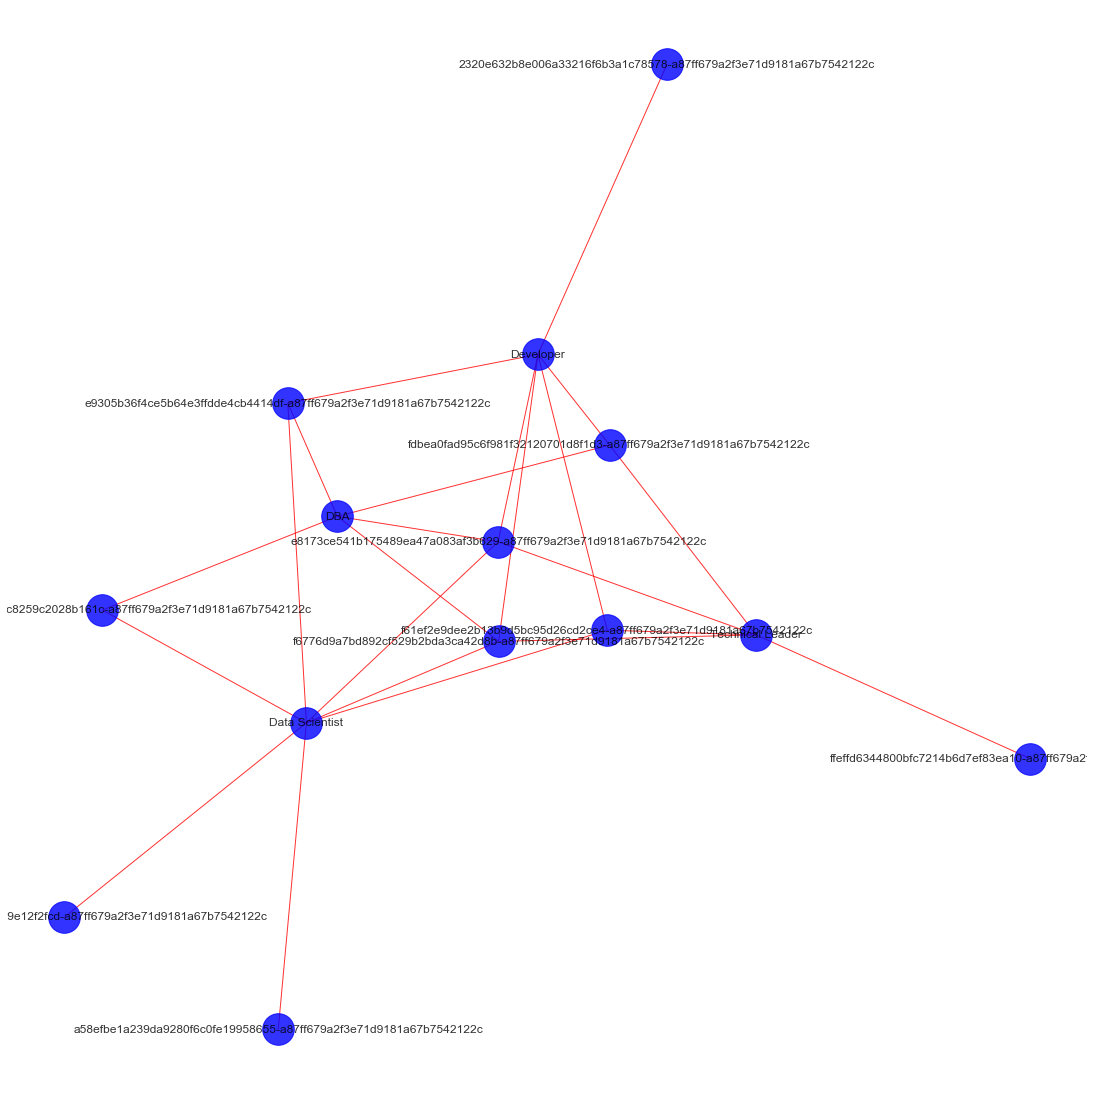

In [182]:
#Librerias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.style as style 

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Gráfico
G = nx.from_pandas_edgelist(dataset3, 'skill_name', 'technology_id')

print(type(G))
# larger figure size
plt.figure(3,figsize=(15,15)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
nx.draw_spring(G, with_labels=True, node_color='b', node_size=1000, alpha=0.8, edge_color="r")
plt.show()

**cambiar nombres de Ids por los techs**

## Ver de colorear las techs que se unene al data scientist 

## Arrancar con sistema de recomendacion.

Partiendo de los skills obtenidos por los Data Scientists:

In [183]:
data_scientists

skill_id  \
person_id                                                                                               
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...   

                                                        skill_name skill_type  \
person_id                                                                       
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...  Data Scientist      skill   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...  Data Scientist      skill   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...  Data Scientist      skill   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...  Data Scientist      skill   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...  Data Scientist      skill   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...  Data Scientist      skill   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...  Data Scientist      skill   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...  Data Scientist      skill   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...  Data Scientist      skill   

                                                   person_name person_type  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...      Hugo S      person   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...    Hernan U      person   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...    Natali L      person   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...    Fernando      person   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...   Mariana T      person   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...      Martin      person   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...   Gustavo M      person   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...     Diego M      person   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...   Luciano M      person   

                                                    person_category  \
person_id                                                             
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                2   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                2   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                2   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                2   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                2   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                3   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                2   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                3   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                3   

                                                   person_gender  person_age  \
person_id                                                                      
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...          male        23.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...          male        22.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...        female        24.0   
5128

In [184]:
clue

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Azure            0.0
technology_name_Docker          15.0
technology_name_EC2              0.0
technology_name_Golden Gate      0.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MariaDB          0.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_Oracle           0.0
technology_name_Oracle Cloud     0.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_Redis            0.0
technology_name_S3               0.0
technology_name_SQL              0.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_neo4j            0.0
technology_name_pentaho          0.0
t

In [185]:
skills_ds

technology_name_AWS  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  7.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                  0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                  0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                  8.0   

                                                    technology_name_AWS Lambda  \
person_id                                                                        
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                         0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                         0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                         0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                         4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                         0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                         0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                         0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                         0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                         0.0   

                                                    technology_name_Azure  \
person_id                                                                   
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                    0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                    0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                    0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                    0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                    0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                    0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                    0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    0.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                    0.0   

                                                    technology_name_Docker  \
person_id                                                                    
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                     0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                     0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                     0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                     4.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                     0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                     0.0   
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f...                     0.0   
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f...                    11.0   
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f...                     0.0   

                                                    technology_name_EC2  \
person_id                                                                 
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f...                  0.0   
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f...                  0.0   
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f...                  0.0   
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e7...                  0.0   
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f...                  0.0   
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e7...                  0.0   
9ea9cb2299b79282

In [186]:
base = skills_ds.pivot_table(columns=skills_ds.index)
base.head()

person_id                   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       7.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                4.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    4.0                   
technology_name_EC2                                                       0.0                   

person_id                   57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_E

In [187]:
base['count'] = base[base !=0 ].count(axis=1, level=None, numeric_only=True)

In [188]:
base['average'] = base.mean(axis=1)

In [189]:
C = base['average'].mean()

In [190]:
m = base['count'].quantile(0.70)

In [191]:
V = base['count']
R = base['average']
C 
m 

base['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

In [192]:
skills_ranked = base.sort_values('weighted_average', ascending=False)

**Recommender Mk1**

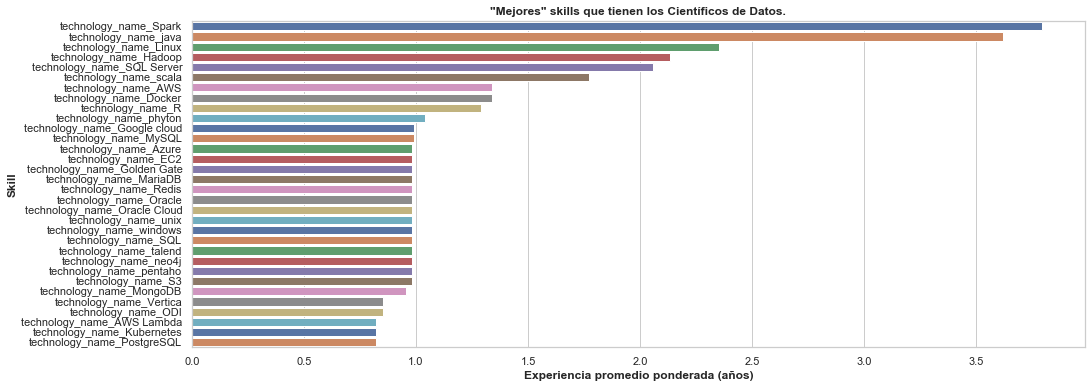

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

wavg = skills_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'], y=wavg.index, data=wavg, palette='deep')

plt.xlim()
plt.title('"Mejores" skills que tienen los Científicos de Datos.', weight='bold')
plt.xlabel('Experiencia promedio ponderada (años)', weight='bold')
plt.ylabel('Skill', weight='bold')

plt.savefig('skills.png')

Esto nos permite tener un recomendador "genérico", sin conocer las skills del RRHH.

**Recommender Mk2**
We can use the popularity feature of our data to recommend movies based on popularity instead:

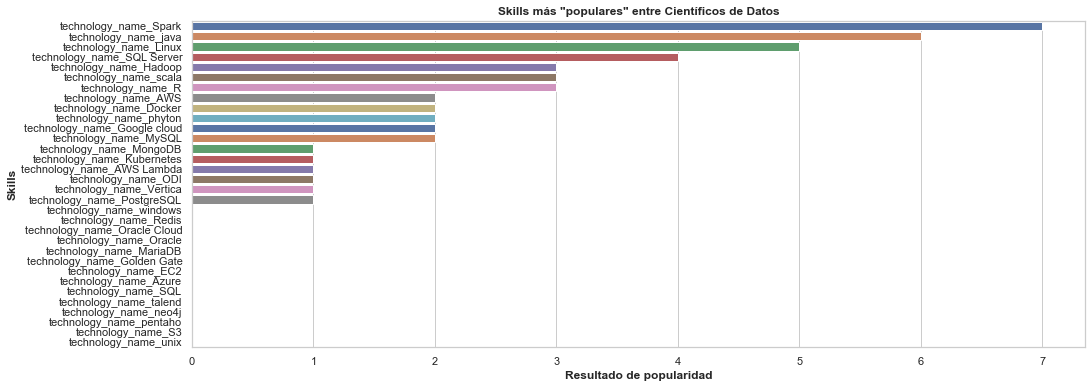

In [194]:
popular = skills_ranked.sort_values('count', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['count'], y=popular.index, data=popular, palette='deep')

plt.title('Skills más "populares" entre Científicos de Datos', weight='bold')
plt.xlabel('Resultado de popularidad', weight='bold')
plt.ylabel('Skills', weight='bold')

plt.savefig('popular_skills.png')

**Recommender Mk3**
Combinación lineal de Mk1 y Mk2:

In [195]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
skills_scaled = min_max_scaler.fit_transform(base[['weighted_average', 'count']])
skills_norm = pd.DataFrame(skills_scaled, columns=['weighted_average', 'count'])
skills_norm.head()

weighted_average     count
0          0.174720  0.285714
1          0.000000  0.142857
2          0.053922  0.000000
3          0.174720  0.285714
4          0.053922  0.000000

In [196]:
a=skills_norm['weighted_average']
a

0     0.174720
1     0.000000
2     0.053922
3     0.174720
4     0.053922
5     0.053922
6     0.057073
7     0.440896
8     0.000000
9     0.514606
10    0.053922
11    0.044818
12    0.057073
13    0.011204
14    0.053922
15    0.053922
16    0.000000
17    0.158543
18    0.053922
19    0.053922
20    0.053922
21    0.416667
22    1.000000
23    0.011204
24    0.941001
25    0.053922
26    0.053922
27    0.073880
28    0.319888
29    0.053922
30    0.053922
31    0.053922
Name: weighted_average, dtype: float64

In [197]:
base['norm_weighted_average'] = pd.Series(skills_norm['weighted_average'], dtype=np.float64)
base['norm_popularity'] = skills_norm['count']
base.head()

person_id                   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       7.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                4.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    4.0                   
technology_name_EC2                                                       0.0                   

person_id                   57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_E

## PORQ NO ME CREA BIEN LAS COLUMNAS!?!?

In [198]:
#Parámetro de la combinación lineal:
m= 0.6


base['score'] = base['norm_weighted_average'] * m + base['norm_popularity'] * (1-m)
skills_scored = base.sort_values(['score'], ascending=False)
skills_scored

person_id                     044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                         0.0                   
technology_name_AWS Lambda                                                  0.0                   
technology_name_Azure                                                       0.0                   
technology_name_Docker                                                      0.0                   
technology_name_EC2                                                         0.0                   
technology_name_Golden Gate                                                 0.0                   
technology_name_Google cloud                                                0.0                   
technology_name_Hadoop                                                      0.0                   
technology_name_Kubernetes                                                  0.0                   
technology_name_Linux                                                       5.0                   
technology_name_MariaDB                                                     0.0                   
technology_name_MongoDB                                                     0.0                   
technology_name_MySQL                                                       0.0                   
technology_name_ODI                                                         0.0                   
technology_name_Oracle                                                      0.0                   
technology_name_Oracle Cloud                                                0.0                   
technology_name_PostgreSQL                                                  0.0                   
technology_name_R                                                           0.0                   
technology_name_Redis                                                       0.0                   
technology_name_S3                                                          0.0                   
technology_name_SQL                                                         0.0                   
technology_name_SQL Server                                                  5.0                   
technology_name_Spark                                                       5.0                   
technology_name_Vertica                                                     0.0                   
technology_name_java                                                        5.0                   
technology_name_neo4j                                                       0.0                   
technology_name_pentaho                                                     0.0                   
technology_name_phyton                                                      0.0                   
technology_name_scala                                                       5.0                   
technology_name_talend                                                      0.0                   
technology_name_unix                                                        0.0                   
technology_name_windows                                                     0.0                   

person_id                     39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                         7.0                   
technology_name_AWS Lambda                                                  0.0                   
technology_name_Azure                                                       0.0                   
technology_name_Docker                                                      0.0                   
technology_name_EC2                                                         0.0                   
technology_name_Golden Gate                                                 0.0                   
technology_name_Google cloud           

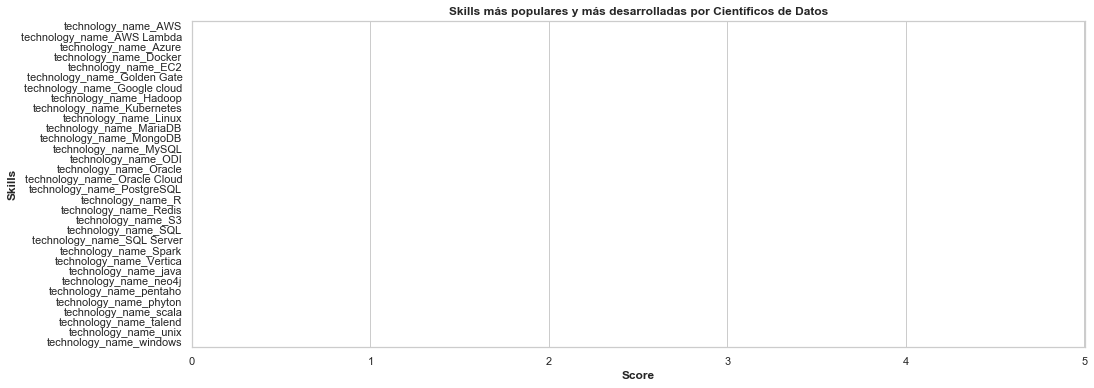

In [199]:
scored = base.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored['score'], y=base.index, data=scored, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Skills más populares y más desarrolladas por Científicos de Datos', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Skills', weight='bold')

plt.savefig('skilss_mk3.png')

## **Calculating Similarity Scores**
Crearemos un recomendador basado en skills, en primer lugar, luego intentaremos restringirlo para convertir a los recursos en Data Scientists.

In [200]:
base2 = skills2.pivot_table(columns=skills2.index)
base2.head()

person_id                   02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    5.0                   
technology_name_EC2                                                       0.0                   

person_id                   10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       7.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_EC2                                                       0.0                   

person_id                   3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c  \
technology_name_AWS                                                       0.0                   
technology_name_AWS Lambda                                                0.0                   
technology_name_Azure                                                     0.0                   
technology_name_Docker                                                    0.0                   
technology_name_E

In [201]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics import pairwise_distances


''' 
El ejemplo usa sigmoid kernel, se puede experimentar con otro tipo de distancias que sean más apropiadas. En particular lo sustituí por distancia euclidea.

'''
# Compute the distances
dis = pd.DataFrame(pairwise_distances(base2, base2), columns= base2.index, index=base2.index)
rev_distances = dis ** -1
rev_distances[rev_distances >1 ] =1
rev_distances

technology_name_AWS  technology_name_AWS Lambda  \
technology_name_AWS                      1.000000                    0.027555   
technology_name_AWS Lambda               0.027555                    1.000000   
technology_name_Azure                    0.027724                    0.250000   
technology_name_Docker                   0.024830                    0.039746   
technology_name_EC2                      0.026603                    0.082761   
technology_name_Golden Gate              0.025692                    0.061314   
technology_name_Google cloud             0.026144                    0.061085   
technology_name_Hadoop                   0.026298                    0.050833   
technology_name_Kubernetes               0.027462                    0.333333   
technology_name_Linux                    0.030585                    0.022076   
technology_name_MariaDB                  0.027545                    0.071982   
technology_name_MongoDB                  0.028537                    0.106000   
technology_name_MySQL                    0.023250                    0.043315   
technology_name_ODI                      0.025071                    0.055556   
technology_name_Oracle                   0.024984                    0.053225   
technology_name_Oracle Cloud             0.025343                    0.058722   
technology_name_PostgreSQL               0.024663                    0.050965   
technology_name_R                        0.027318                    0.156174   
technology_name_Redis                    0.027724                    0.250000   
technology_name_S3                       0.026603                    0.082761   
technology_name_SQL                      0.027308                    0.116248   
technology_name_SQL Server               0.022917                    0.032158   
technology_name_Spark                    0.025206                    0.051778   
technology_name_Vertica                  0.025786                    0.064957   
technology_name_java                     0.038069                    0.022322   
technology_name_neo4j                    0.027724                    0.171499   
technology_name_pentaho                  0.027535                    0.171499   
technology_name_phyton                   0.027077                    0.124035   
technology_name_scala                    0.026225                    0.073127   
technology_name_talend                   0.027724                    0.171499   
technology_name_unix                     0.026519                    0.080322   
technology_name_windows                  0.024884                    0.053606   

                              technology_name_Azure  technology_name_Docker  \
technology_name_AWS                        0.027724                0.024830   
technology_name_AWS Lambda                 0.250000                0.039746   
technology_name_Azure                      1.000000                0.039253   
technology_name_Docker                     0.039253                1.000000   
technology_name_EC2                        0.087706                0.043153   
technology_name_Golden Gate                0.063246                0.035072   
technology_name_Google cloud               0.062994                0.042601   
technology_name_Hadoop                     0.051917                0.044544   
technology_name_Kubernetes                 0.200000                0.040032   
technology_name_Linux                      0.021990                0.022816   
technology_name_MariaDB                    0.075165                0.035489   
technology_name_MongoDB                    0.117041                0.037216   
technology_name_MySQL                      0.042679                0.033710   
technology_name_ODI                        0.056980                0.037398   
technology_name_Oracle                     0.054473                0.037582   
technology_name_Oracle Cloud               0.060412                0.038320   
technology_na

In [202]:
def give_rec(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [203]:
# Testing our content-based recommendation system
give_rec('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_S3',
 'technology_name_EC2',
 'technology_name_unix']

In [204]:
#Traemos las skills que solo poseen los data scientits, y las usaremos para filtrar las recomendaciones
ds_skills = clue[clue != 0]
ds_skills

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Docker          15.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_phyton           9.0
technology_name_scala           20.0
dtype: float64

In [205]:
def give_rec_ds(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)
    
    #Skills that only DS have
    dis_scores = dis_scores[dis_scores.index.isin(ds_skills.index)]

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [206]:
give_rec_ds('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_Google cloud',
 'technology_name_R',
 'technology_name_AWS Lambda']

### Con esto tenemos un recomendador de Skills (para cursos por ejemplo), para responder a la pregunta: ¿Qué le recomendamos a X cómo próxima skill que debería dominar?

### A continuación respondemos a la pregunta: ¿Cómo valoraría X adquirir una skill?

Para ello buscaremos la correlación entre los individuos. Luego seleccionaremos los n individuos más cercanos a la persona X, e inferiremos la valoracion (a través de la experiencia), de multiplicar la correlación de cada individo con X por la experiencia de cada individuo.

In [207]:
'''
Se me complicó la normalización porque pierdo el dataframe, y me devuelve un array
#antes que nada normalizamos las experiencias para llevarlo a una escala de 0 a 10:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(base2)
df_recom = scaler.transform(base2)
dfdf_recom
'''

'\nSe me complicó la normalización porque pierdo el dataframe, y me devuelve un array\n#antes que nada normalizamos las experiencias para llevarlo a una escala de 0 a 10:\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(base2)\ndf_recom = scaler.transform(base2)\ndfdf_recom\n'

In [208]:
def neighbors(id = None, n=5):
    
#Armamos la matriz de correlaciones de Pearson
    corr_ind = base2.corr()

#Seleccionamos al individuo y traemos su fila y la ordenamos por semejanza
    all_neighbors = corr_ind.loc[id].sort_values(ascending=False)
    
#Devolvemos los n más cercanos sin incluirlo
    
    return all_neighbors.iloc[1:n+1]

In [209]:
def likeness_pred(id = None, n=10, tech=None):

    #usamos la función de vecinos para traer los N más cercanos
    nei = neighbors(id, n)
    
    #tomamos la valoración de los individuos para la tecnología
    technology = base2.loc[tech]
    
    #devolvemos la media de la multiplicación de las valoraciones por la correlación
    return technology.multiply(n).dropna().mean()

In [210]:
likeness_pred(id='10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c', n=10, tech='technology_name_Hadoop')

10.232558139534884

Con esto podemos predecir cuanto apreciará ganar experiencia en una determinada tecnología un individo X.